Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



Read in the simulation data

In [2]:
simData = pd.read_csv('records/simulation-record-3-40.csv')
simData.columns

Index(['time', 'delta_time', 'follower_world_cs_x', 'follower_world_cs_z',
       'follower_compass_heading', 'leader_world_cs_x', 'leader_world_cs_z',
       'leader_follower_cs_x', 'leader_follower_cs_z', 'follower_FT_R11',
       'follower_FT_R21', 'follower_FT_R12', 'follower_FT_R22',
       'x_relative_error_heading', 'compass_relative_error_heading',
       'linear_distance_error', 'omega', 'v', 'v_without_angle_error', 'v_max',
       'left_wheel_velocity', 'right_wheel_velocity', 'follower_wheel_radius',
       'follower_axle_length', 'proportional_gain', 'integral_gain',
       'derivative_gain', 'logistic_function_mid',
       'logistic_function_growth_rate', 'max_follower_distance',
       'min_follower_distance', 'optimal_follower_distance'],
      dtype='object')

In [3]:
simData

,time,delta_time,follower_world_cs_x,follower_world_cs_z,follower_compass_heading,leader_world_cs_x,leader_world_cs_z,leader_follower_cs_x,leader_follower_cs_z,follower_FT_R11,...,follower_wheel_radius,follower_axle_length,proportional_gain,integral_gain,derivative_gain,logistic_function_mid,logistic_function_growth_rate,max_follower_distance,min_follower_distance,optimal_follower_distance
0,0,1,1.000033,0.928262,0.039565,0.000000,0.000000,-0.999392,-0.928952,1.000000,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
1,1,1,0.978188,0.925899,353.921040,1.012815,15.138619,1.539544,14.129134,0.994377,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
2,2,1,0.950508,0.933529,347.444062,1.059081,15.705161,3.317221,14.394754,0.976084,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
3,3,1,0.859650,1.360443,348.338179,1.175288,16.521852,3.373770,14.784642,0.979358,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
4,4,1,0.665091,2.419767,350.755371,1.388638,17.794586,3.184114,15.058885,0.987011,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
5,5,1,0.445234,3.975028,353.891057,1.699352,19.552454,2.904735,15.355505,0.994321,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
6,6,1,0.269439,5.994332,357.636194,2.181410,22.272129,2.581714,16.185088,0.999149,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
7,7,1,0.213100,8.271872,1.723628,2.614434,24.715158,1.905659,16.508075,0.999548,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
8,8,1,0.296067,10.859223,3.524145,2.999607,26.890646,1.712989,16.167291,0.998109,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5
9,9,1,0.449218,13.514510,3.731716,3.335418,28.791586,1.885776,15.432532,0.997880,...,0.5,2.8,30,1,0.2,1,7,15,12,13.5


Plot the world-coordinates of the Follower and Leader

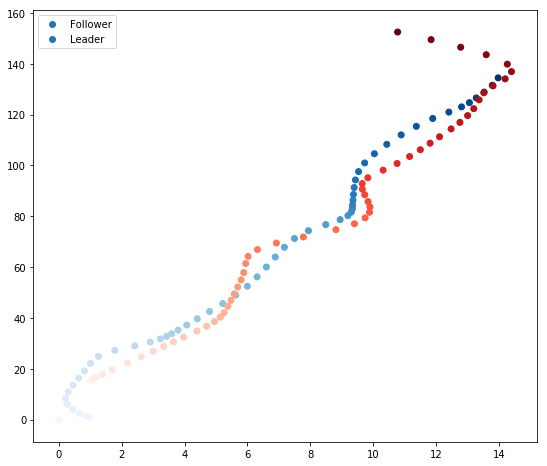

In [4]:
fig = plt.figure(figsize=(7,6))
axes = fig.add_axes([0,0,1,1])
axes.scatter(simData['follower_world_cs_x'], simData['follower_world_cs_z'], c=simData['time'], cmap="Blues", label="Follower")
axes.scatter(simData['leader_world_cs_x'], simData['leader_world_cs_z'], c=simData['time'], cmap="Reds", label="Leader")

axes.legend()

Plotting the Leader in the Follower's Reference Frame

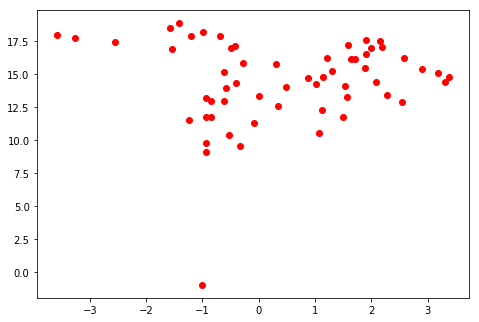

In [5]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.scatter(simData['leader_follower_cs_x'], simData['leader_follower_cs_z'], c="red")

Plot the X Relative Heading against the Compass Relative Heading

In [6]:
simData[['time','x_relative_error_heading', 'compass_relative_error_heading']]

,time,x_relative_error_heading,compass_relative_error_heading
0,0,-137.092014,-132.907986
1,1,83.781447,6.218553
2,2,77.022939,12.977061
3,3,77.145538,12.854462
4,4,78.060991,11.939009
5,5,79.288177,10.711823
6,6,80.936995,9.063005
7,7,83.415039,6.584961
8,8,83.951848,6.048152
9,9,83.033287,6.966713


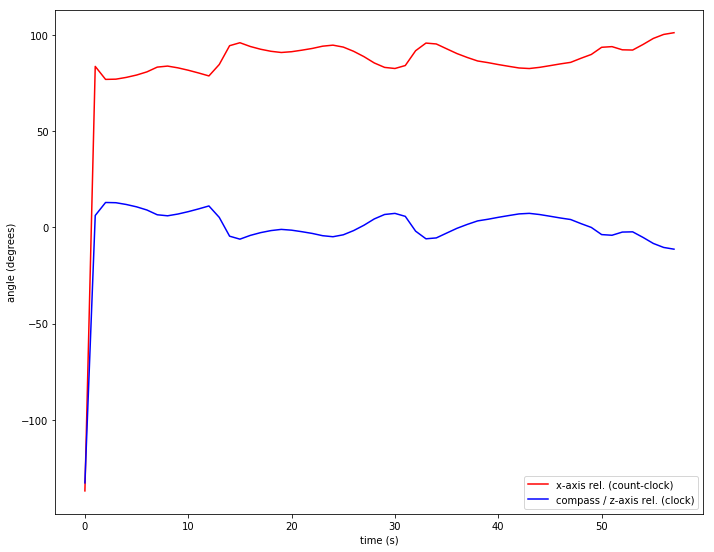

In [7]:


fig = plt.figure(figsize=(9,7))
axes = fig.add_axes([0,0,1,1])


axes.plot(simData['time'], simData['x_relative_error_heading'], c="red", label="x-axis rel. (count-clock)")
axes.plot(simData['time'], simData['compass_relative_error_heading'], c="blue", label="compass / z-axis rel. (clock)")
axes.set_xlabel('time (s)')
axes.set_ylabel('angle (degrees)')
axes.legend()




Compare the world coordinates view of the two rovers, with the Follower cooridnates view of the two rovers

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


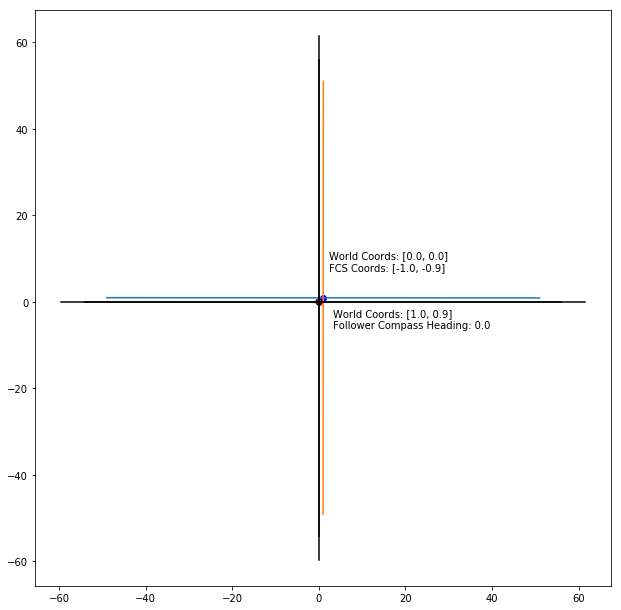

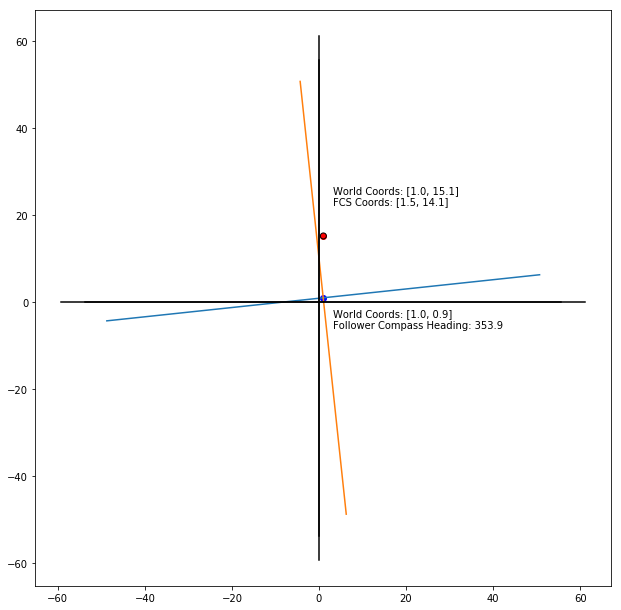

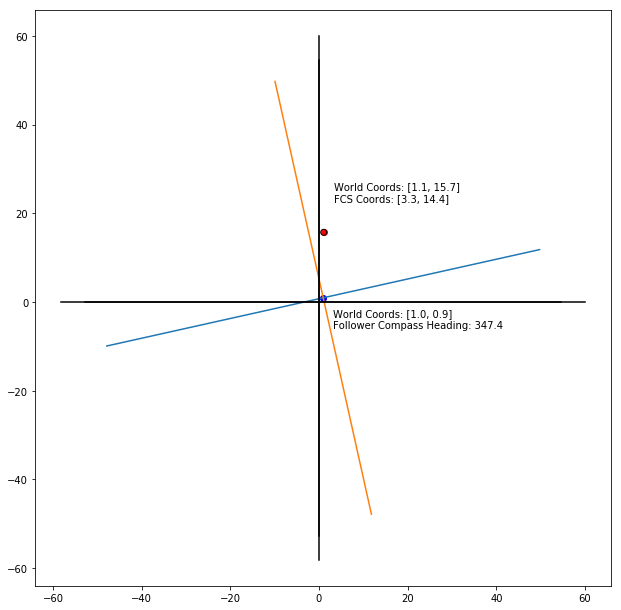

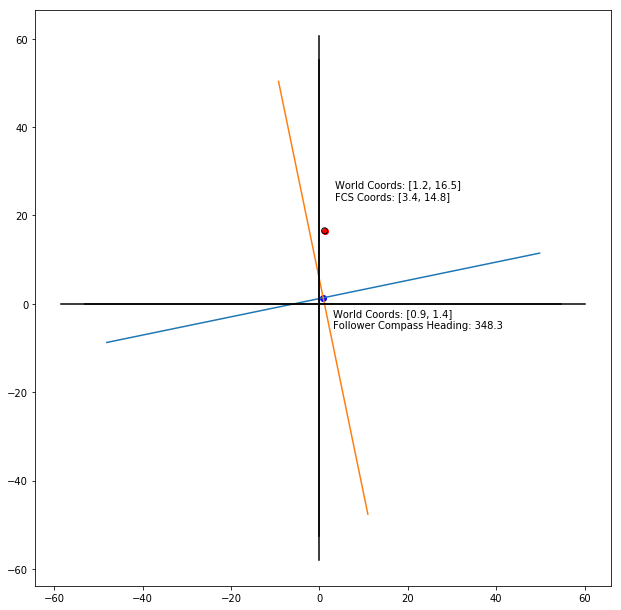

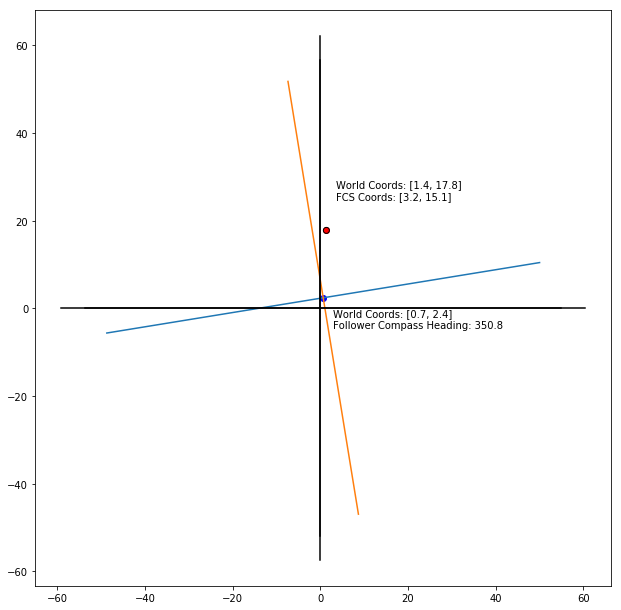

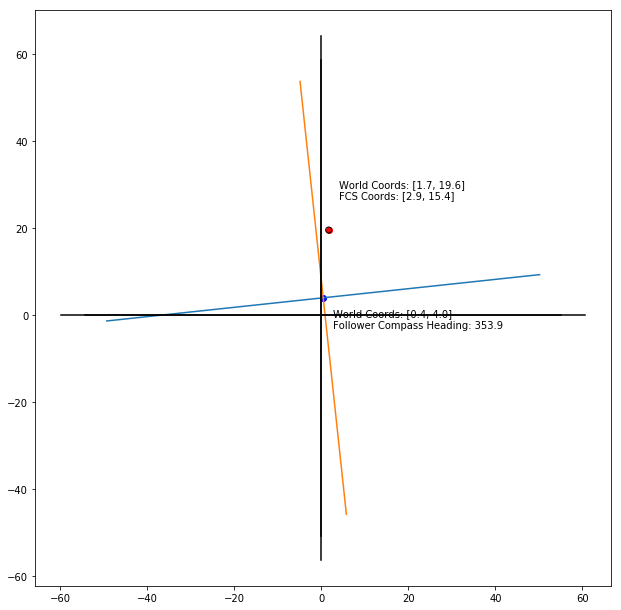

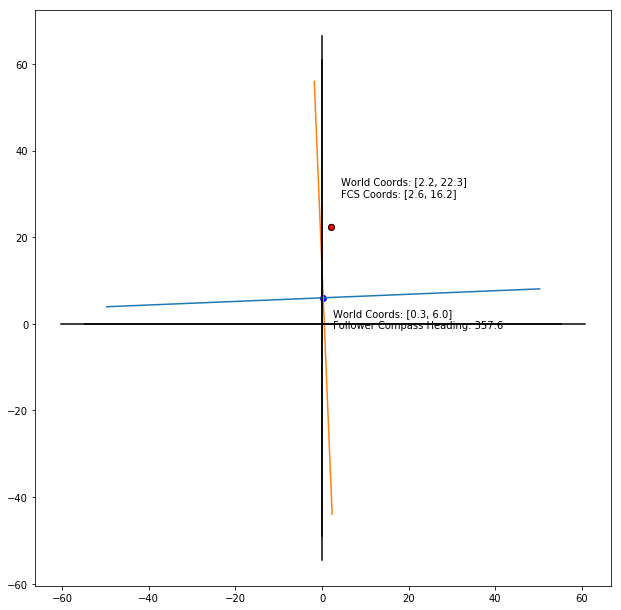

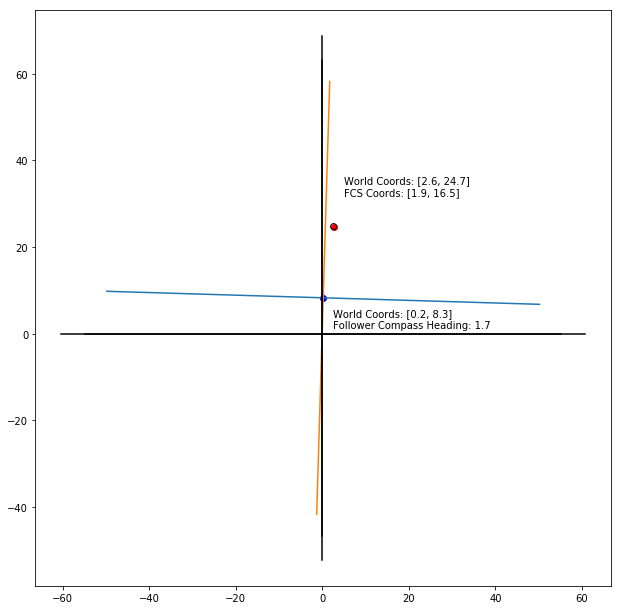

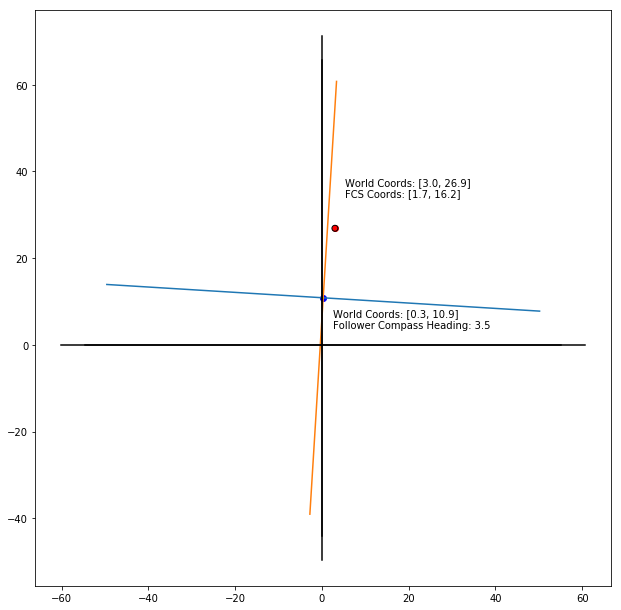

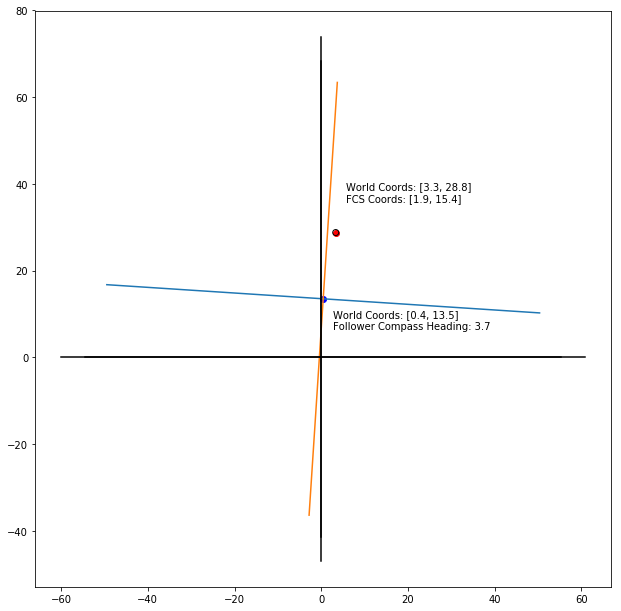

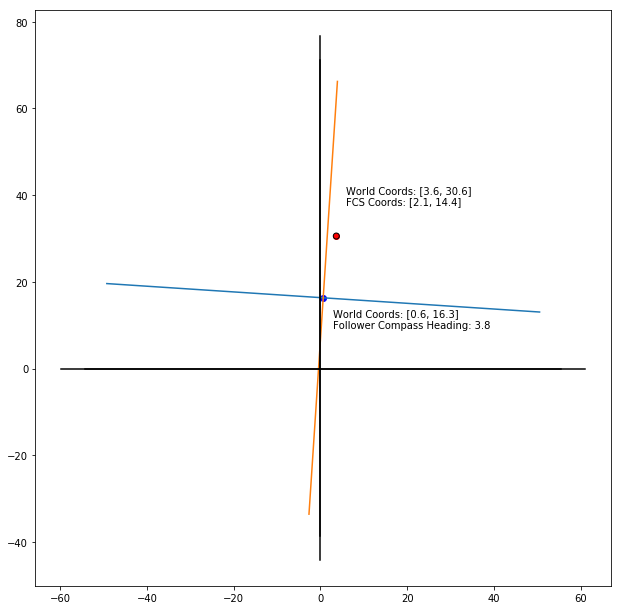

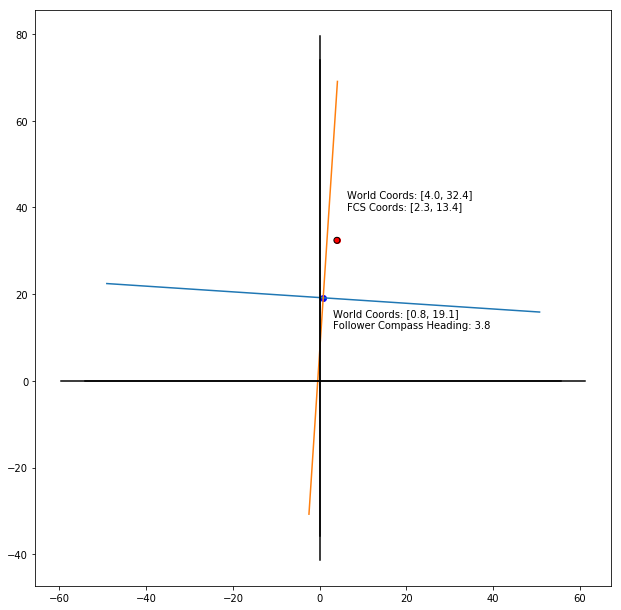

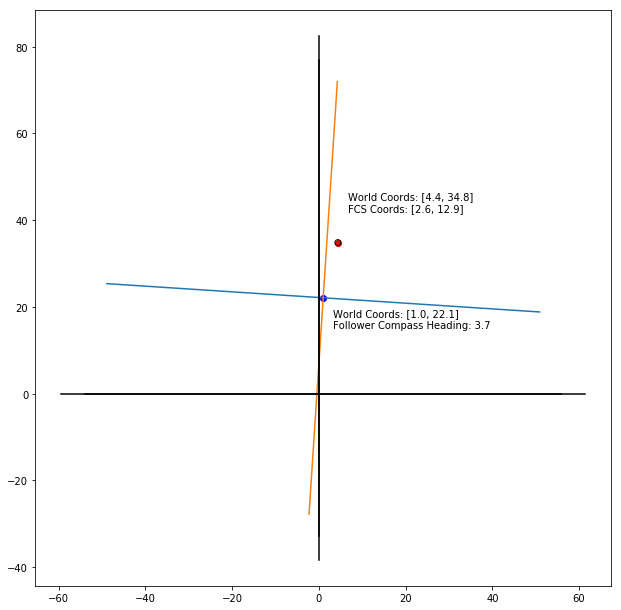

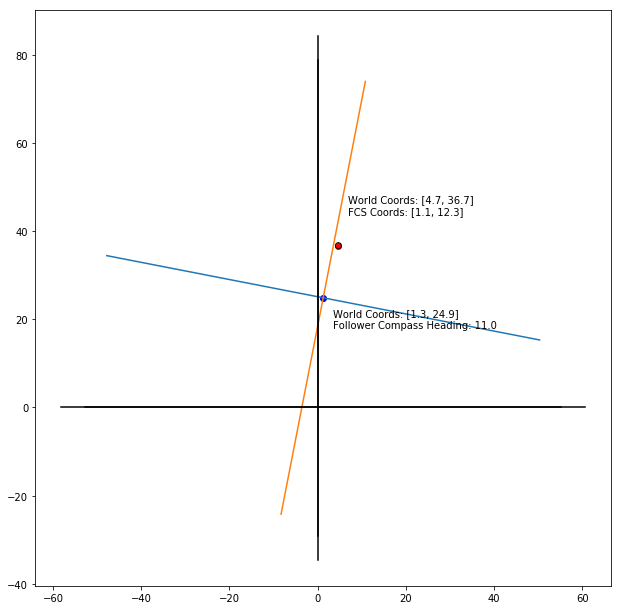

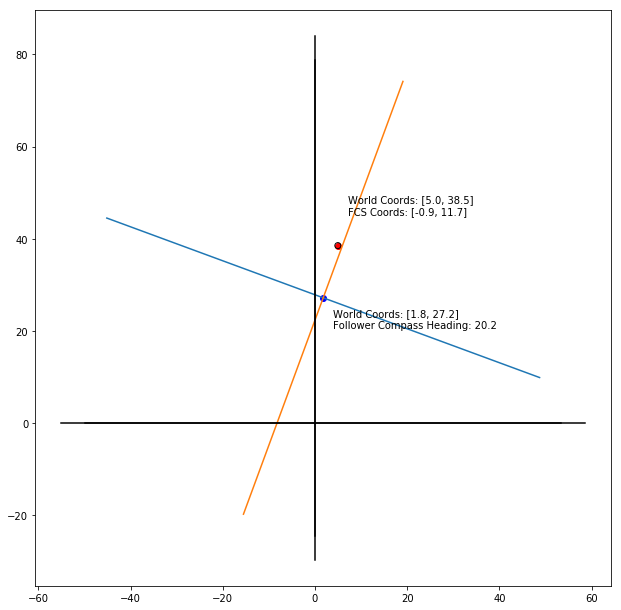

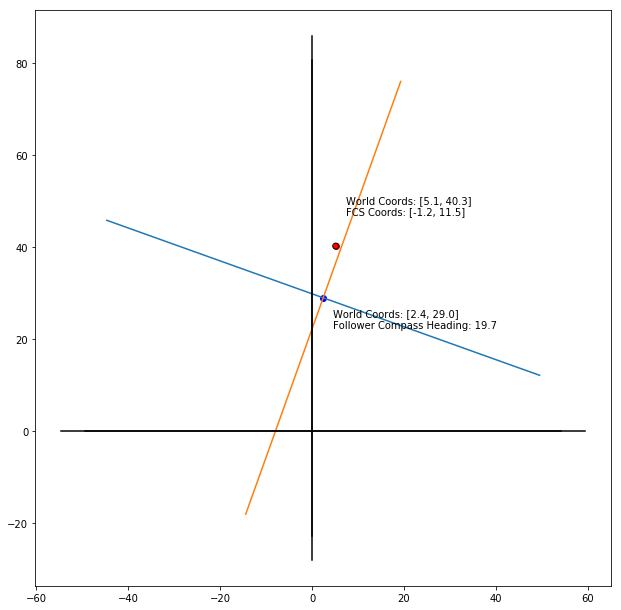

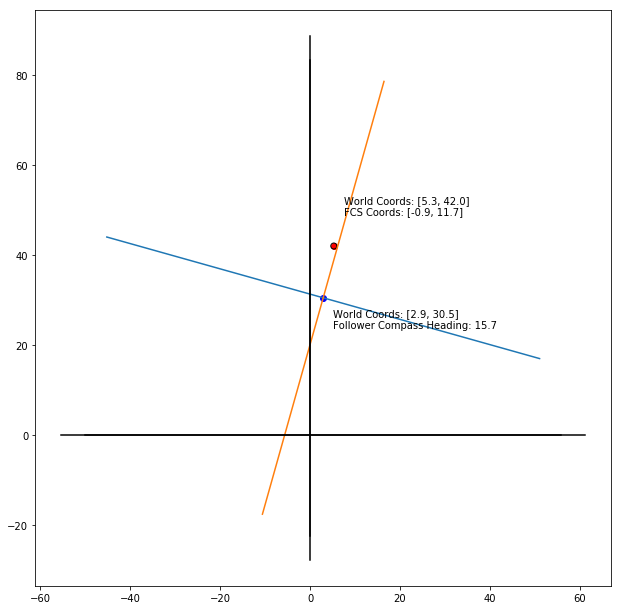

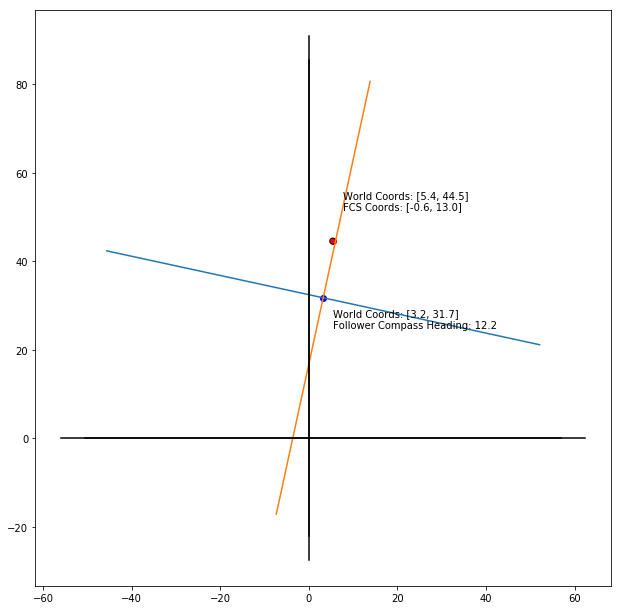

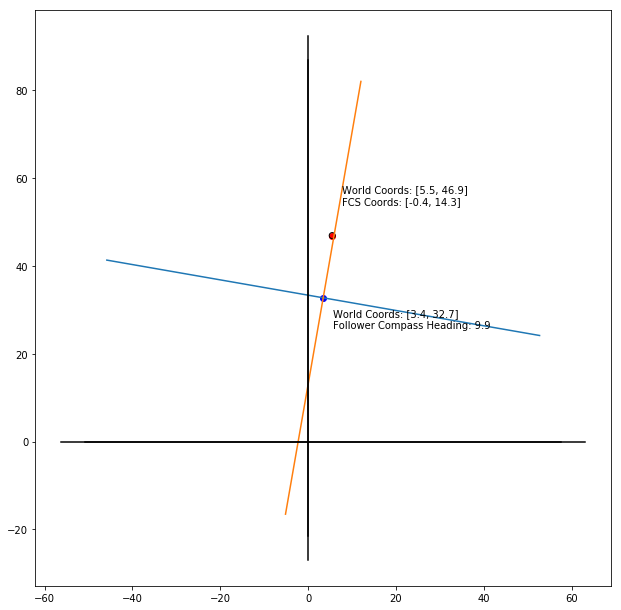

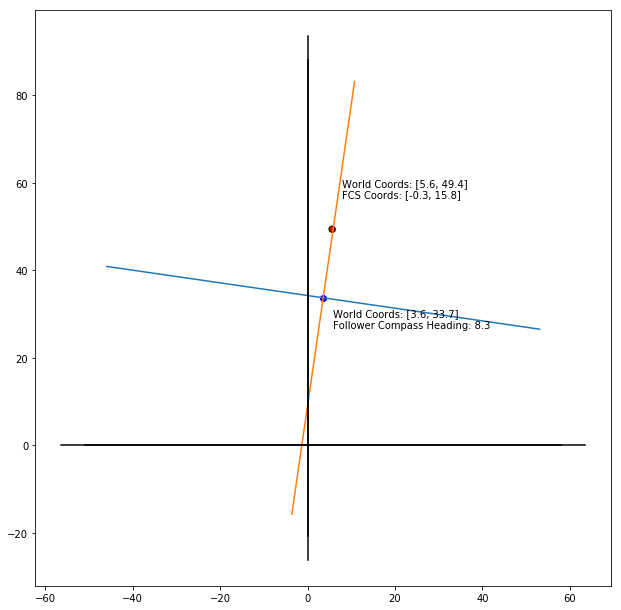

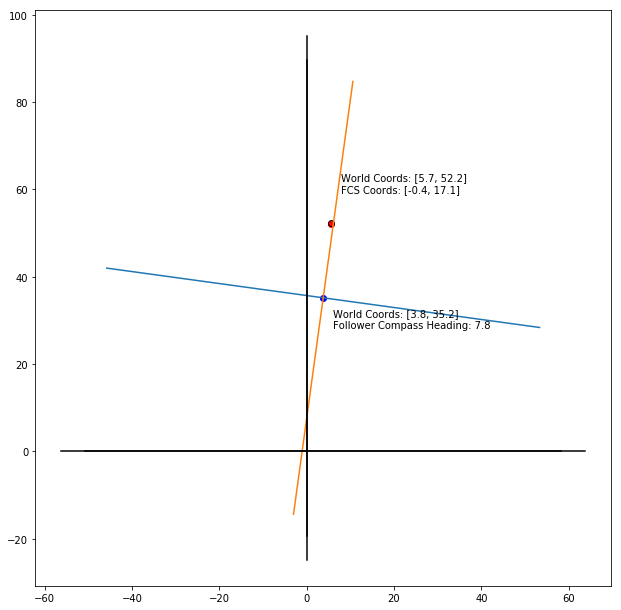

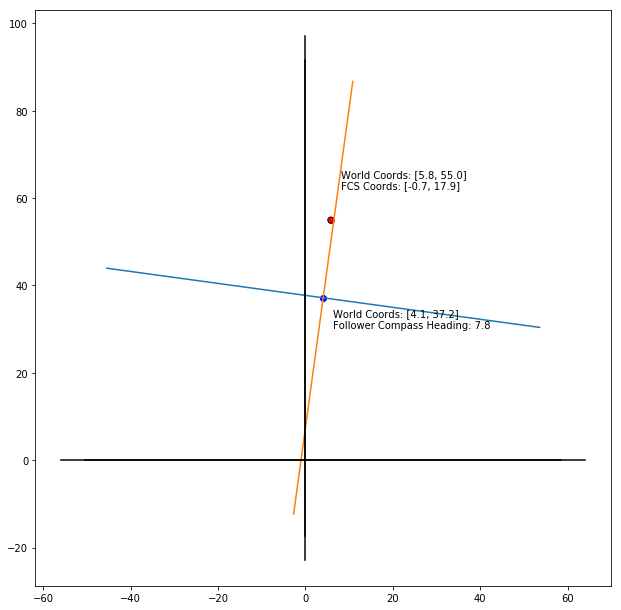

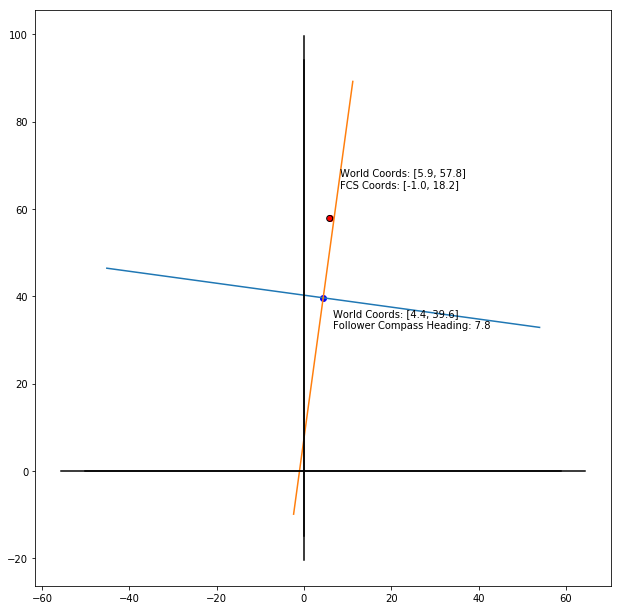

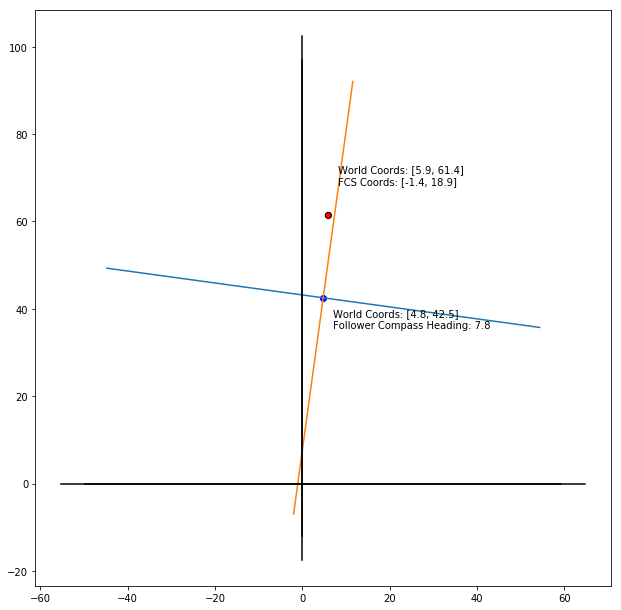

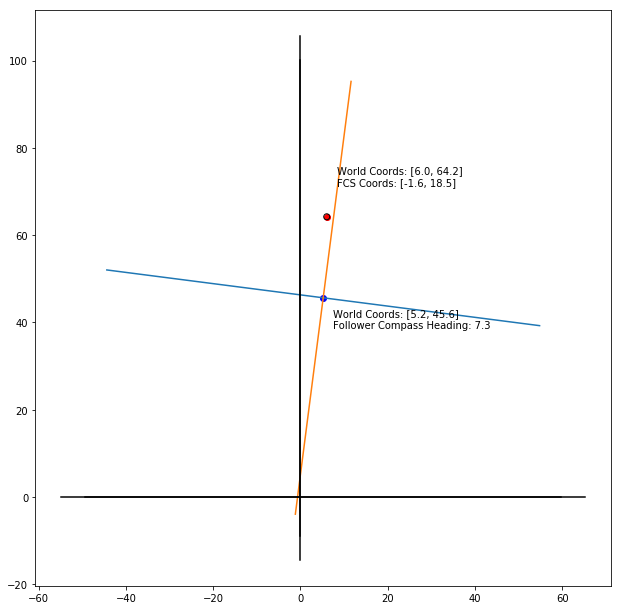

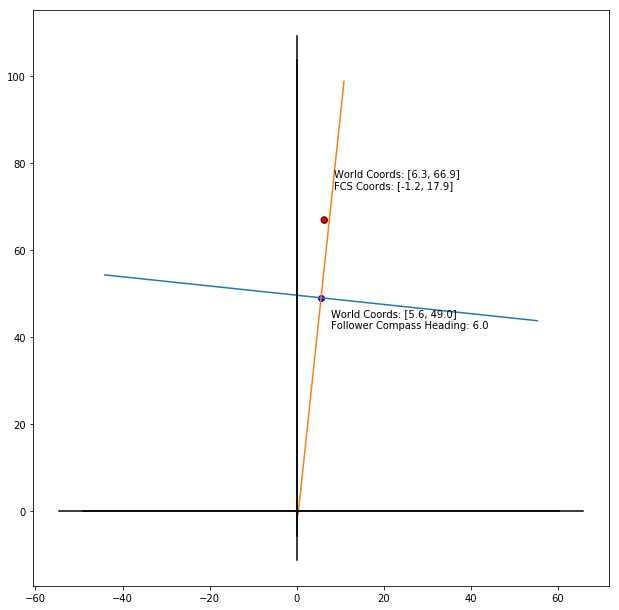

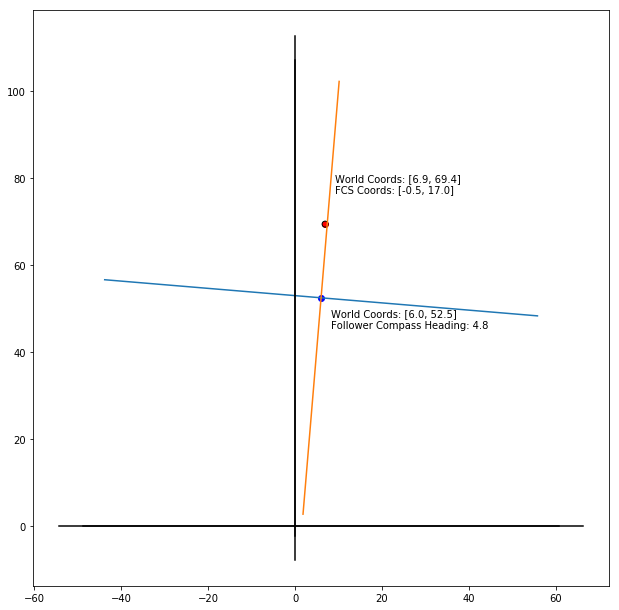

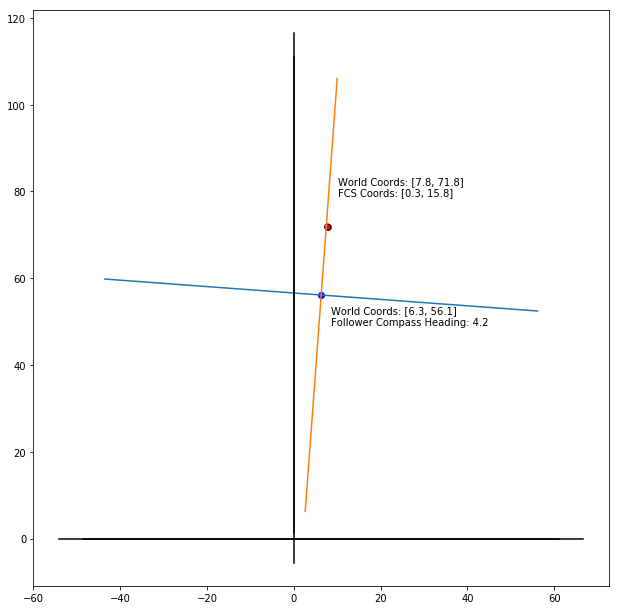

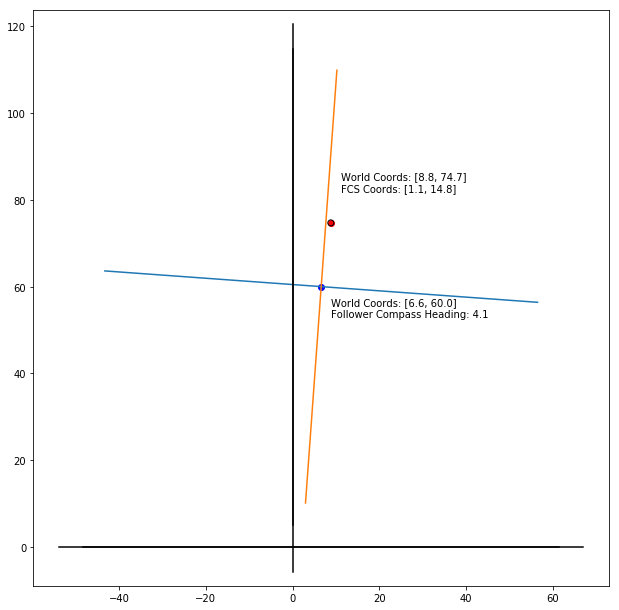

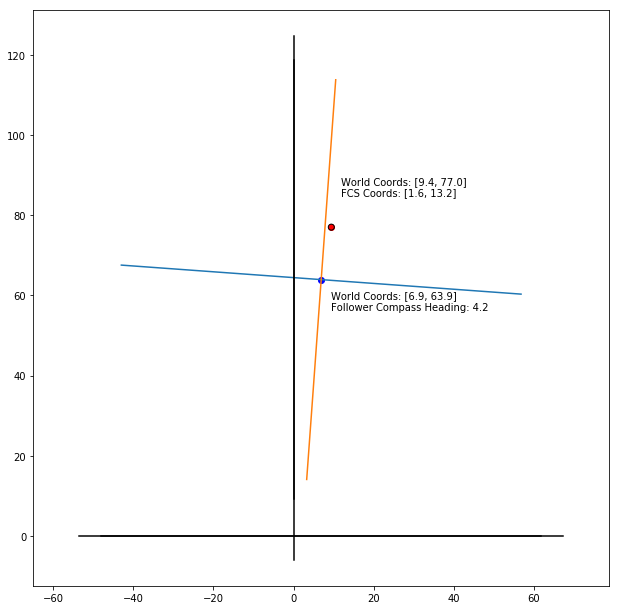

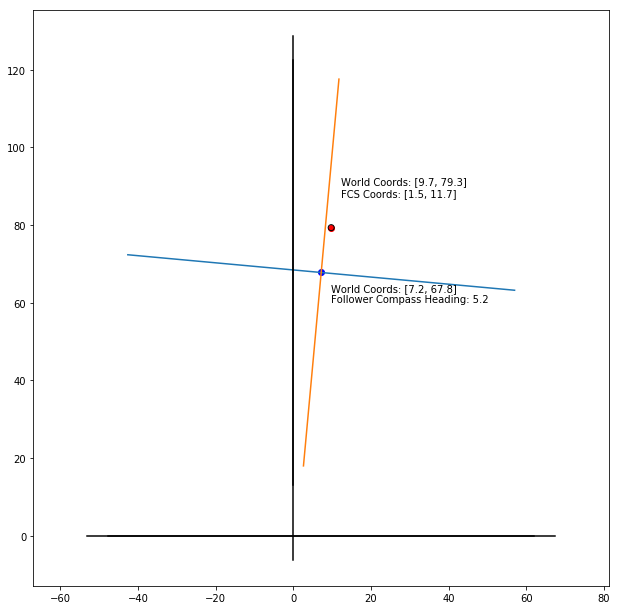

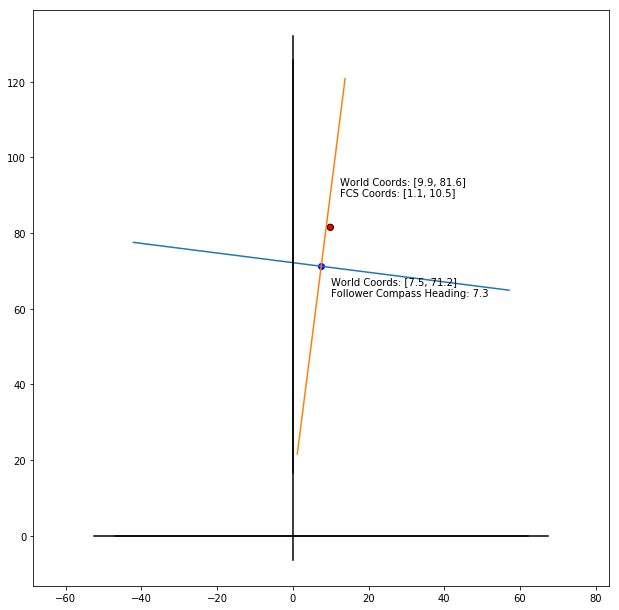

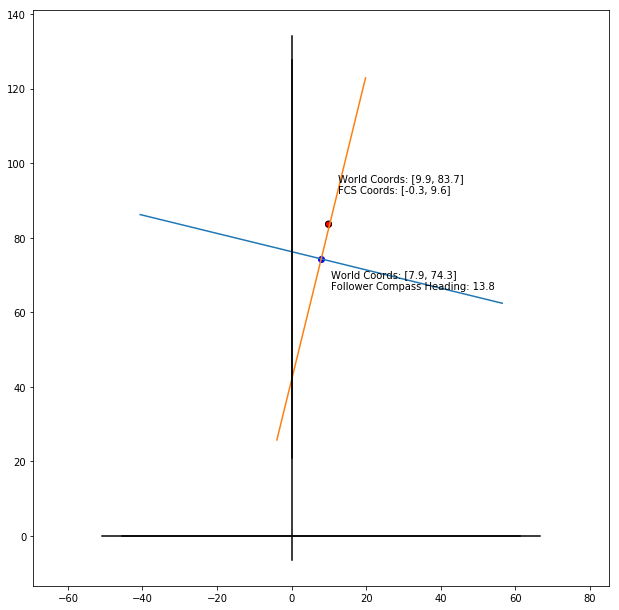

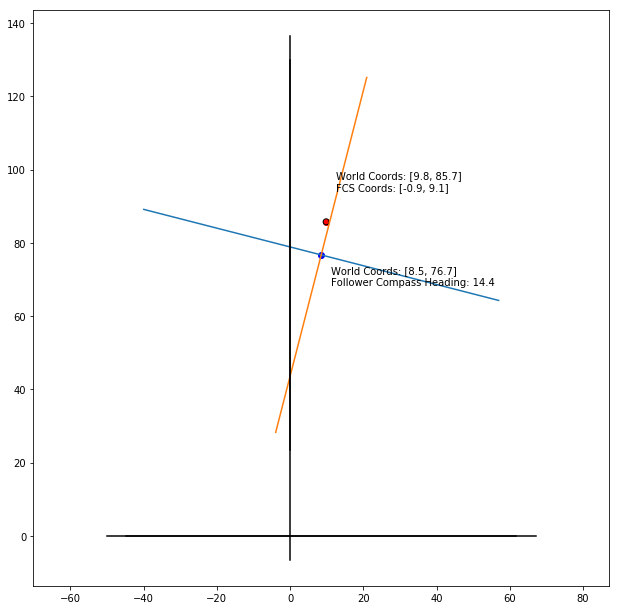

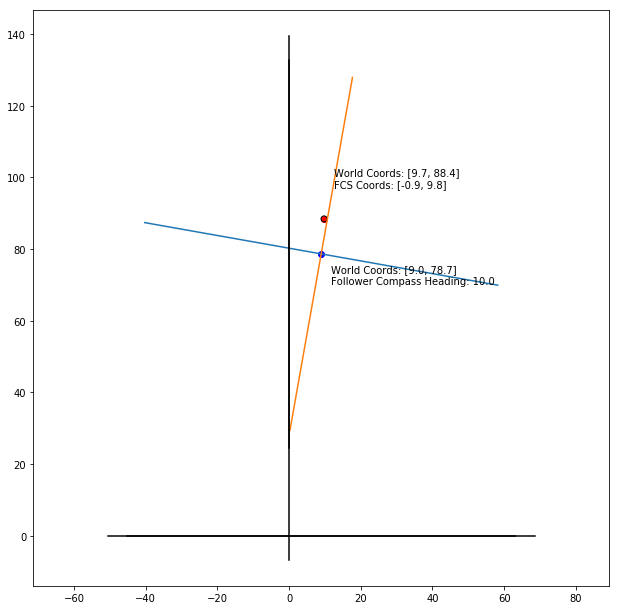

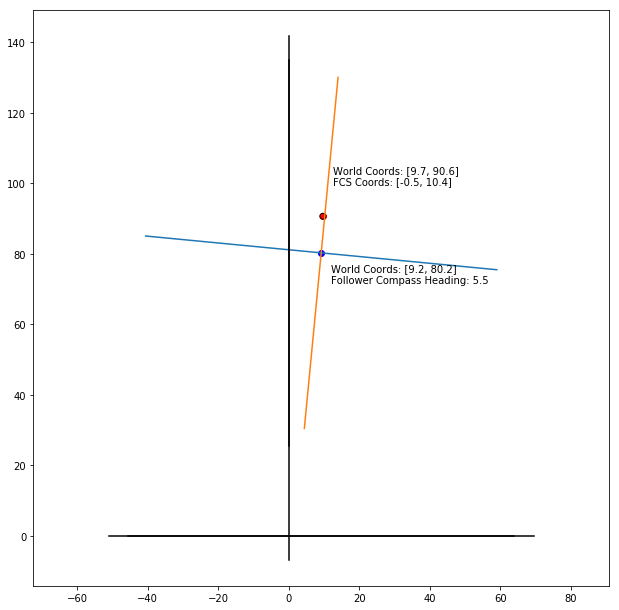

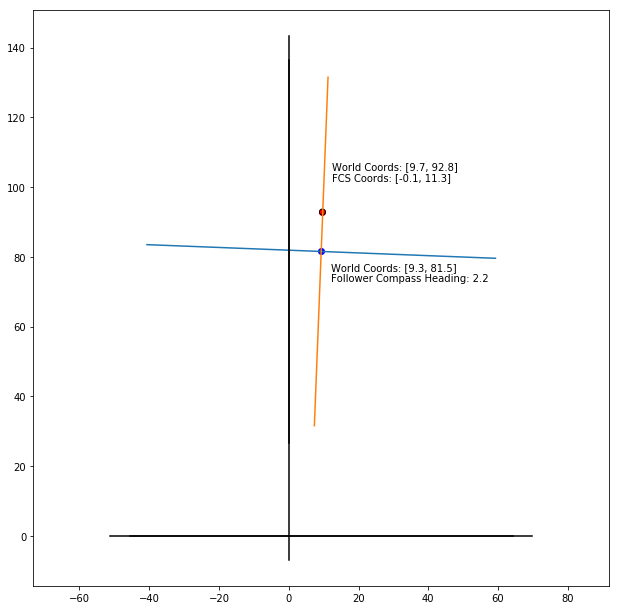

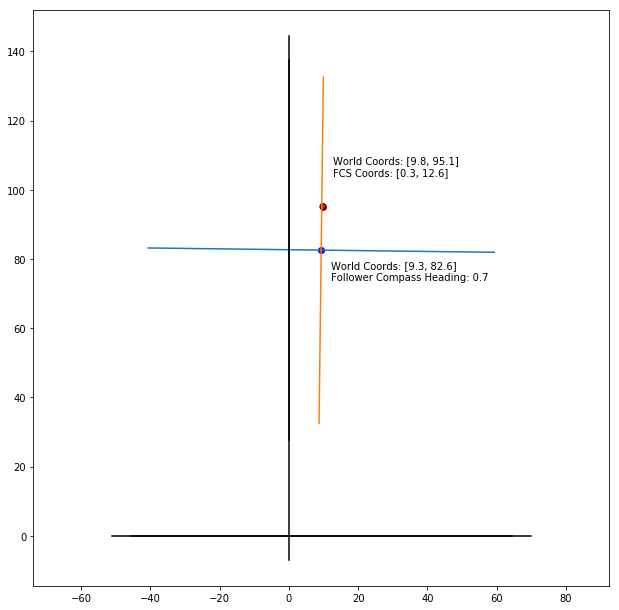

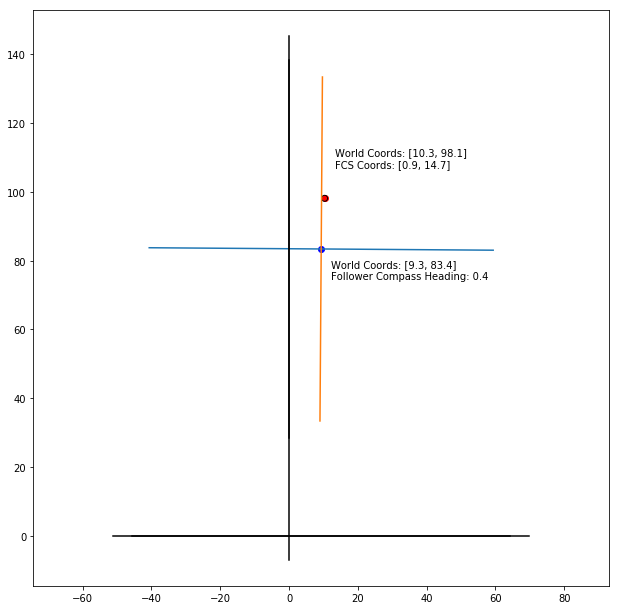

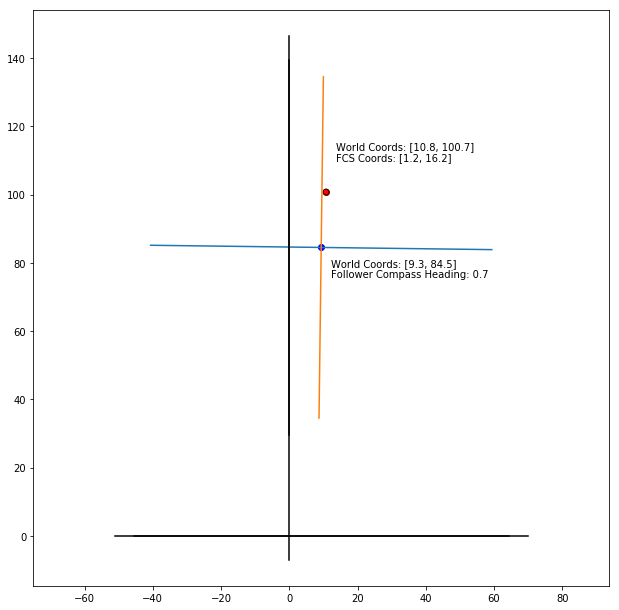

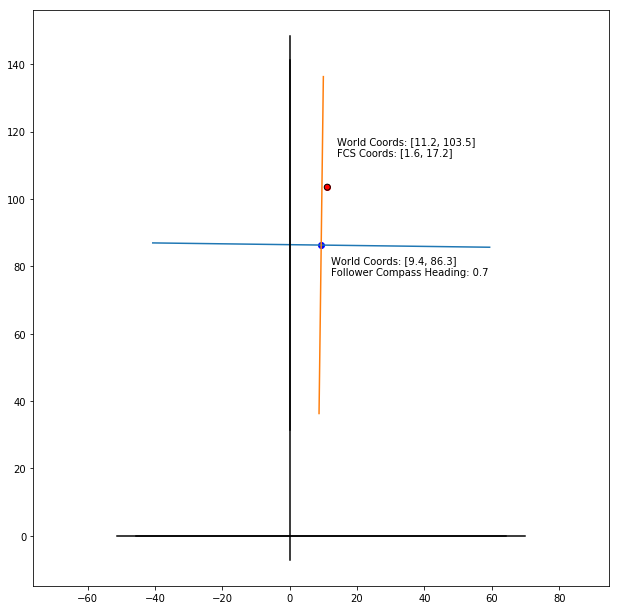

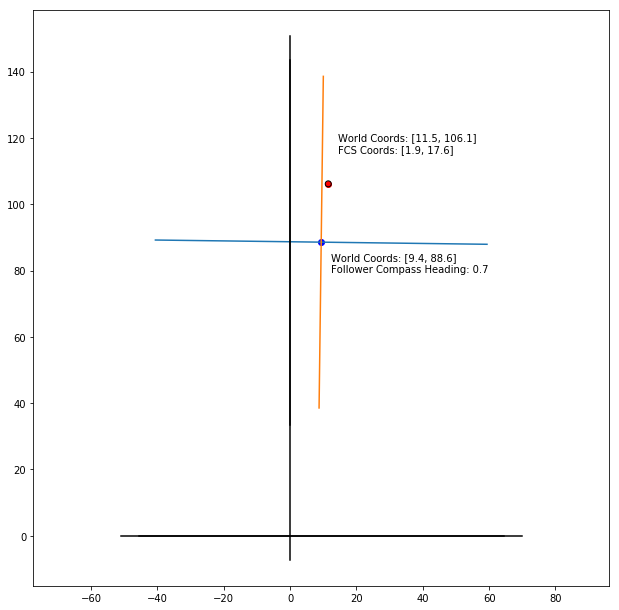

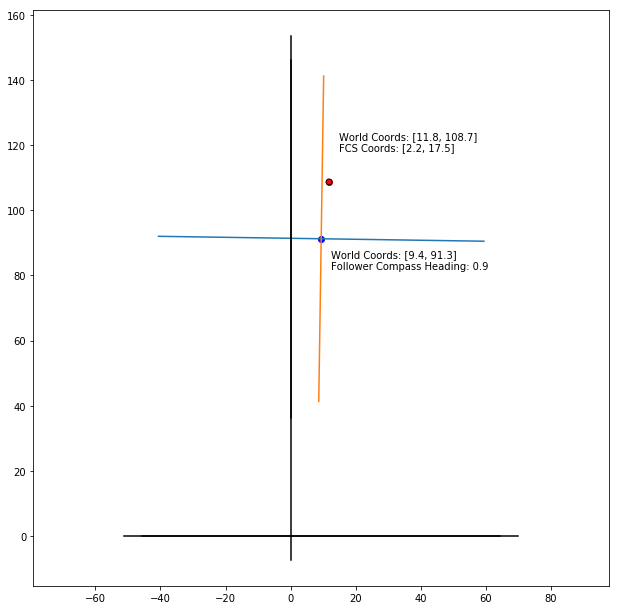

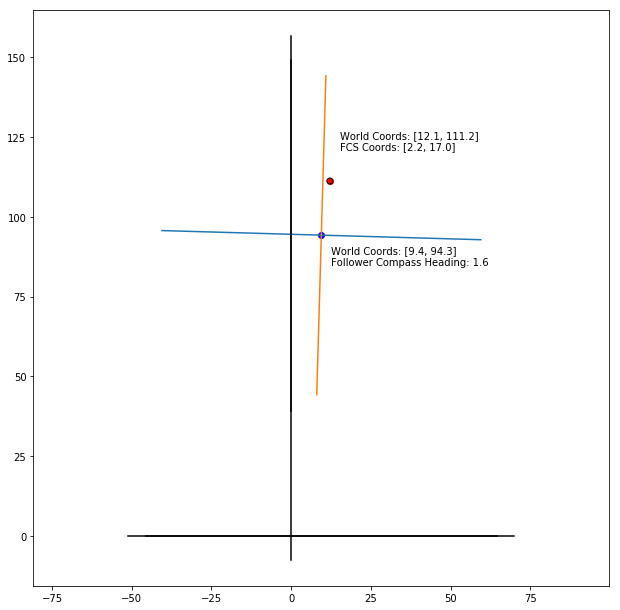

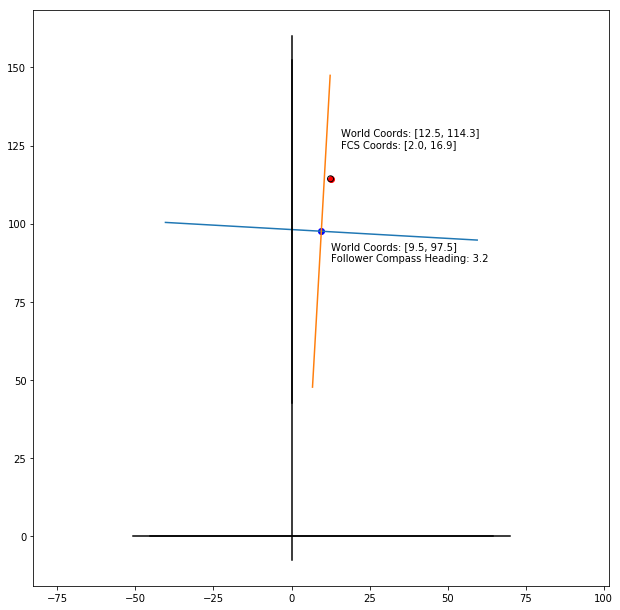

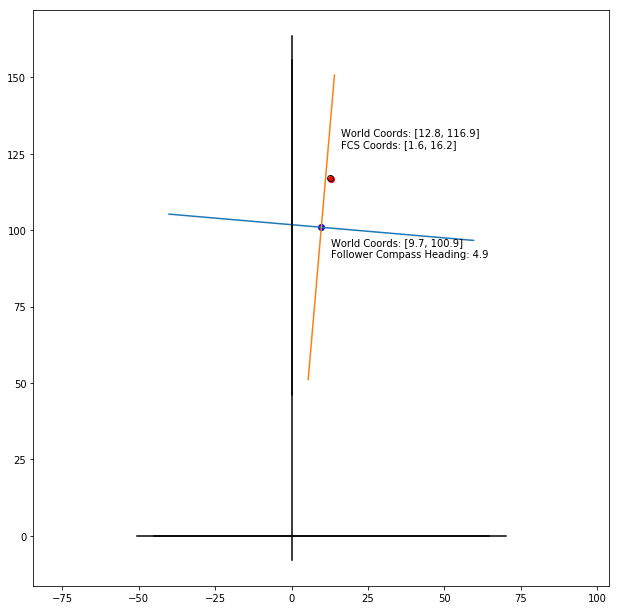

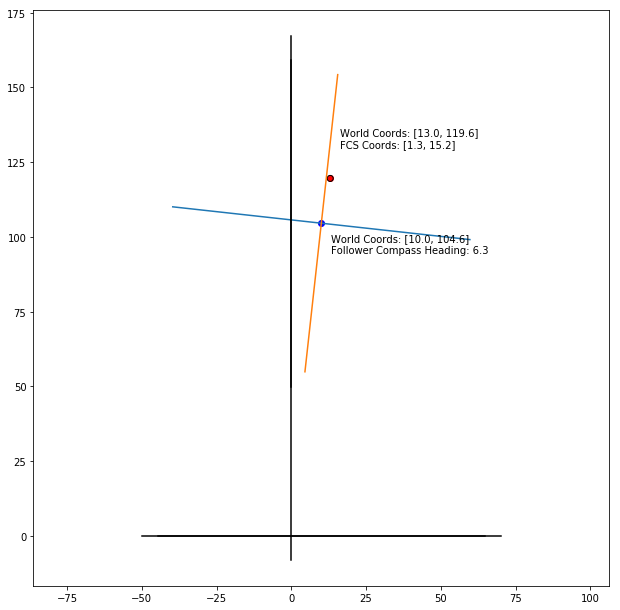

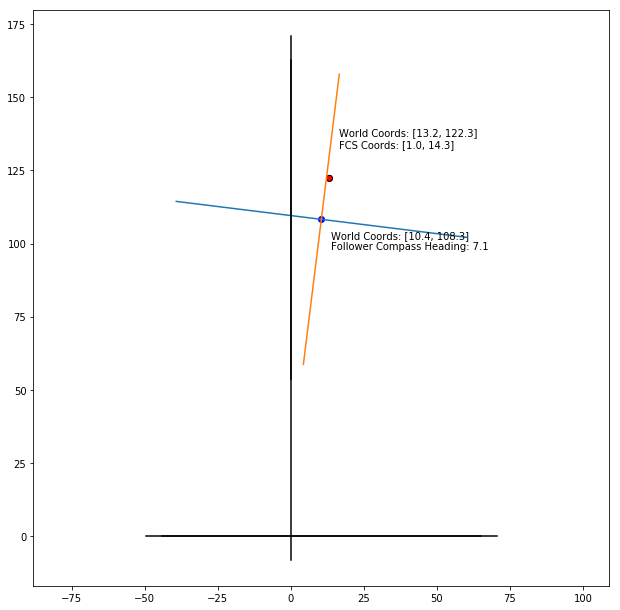

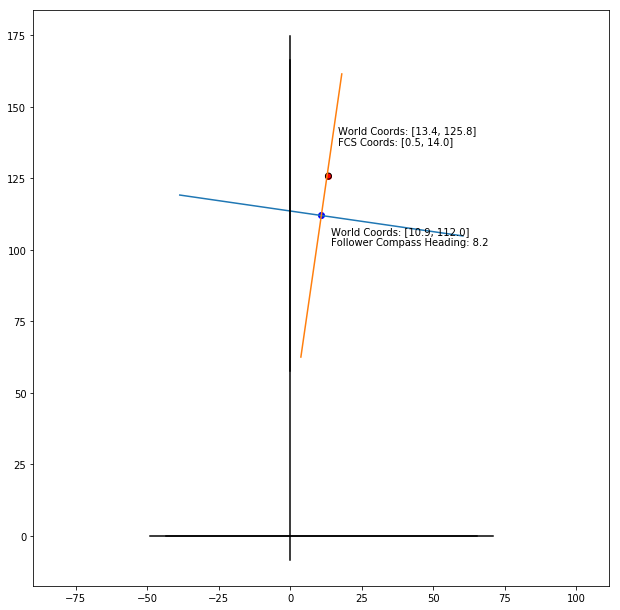

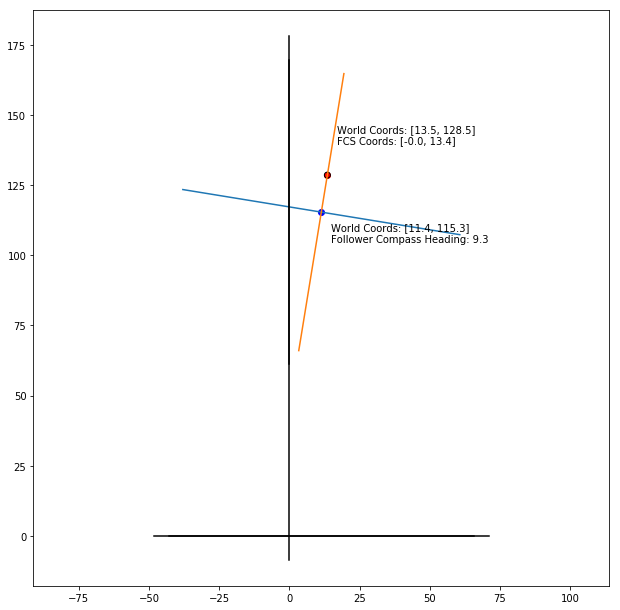

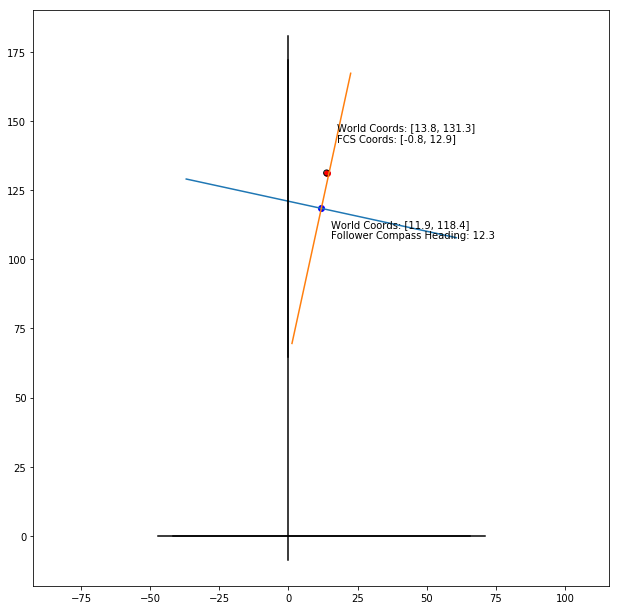

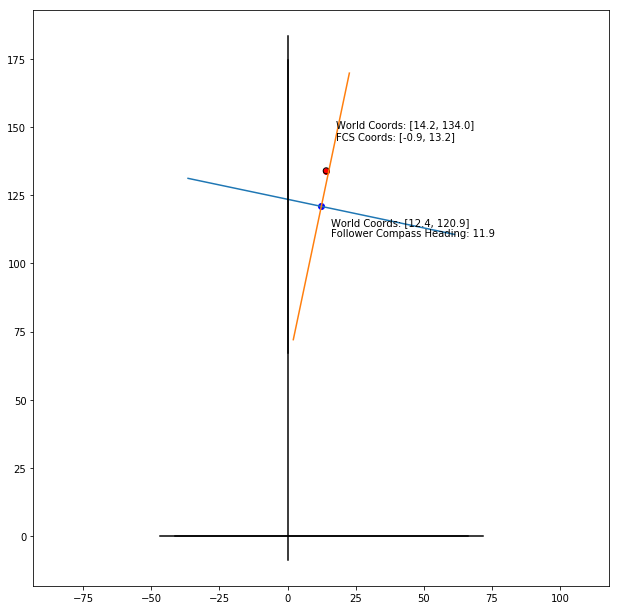

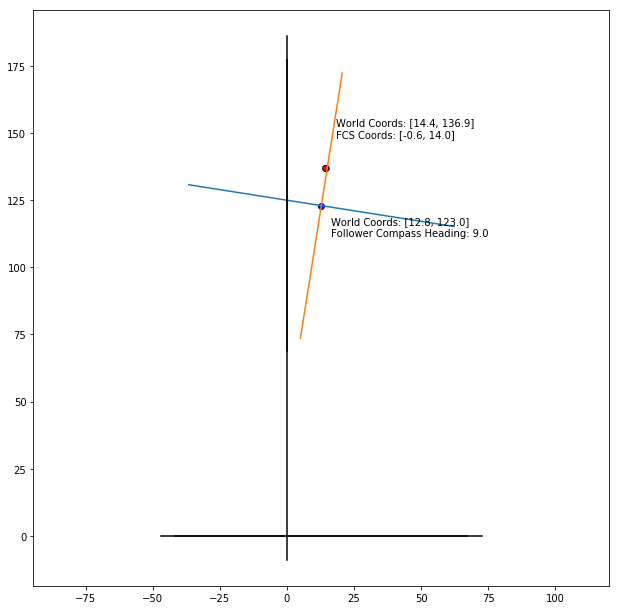

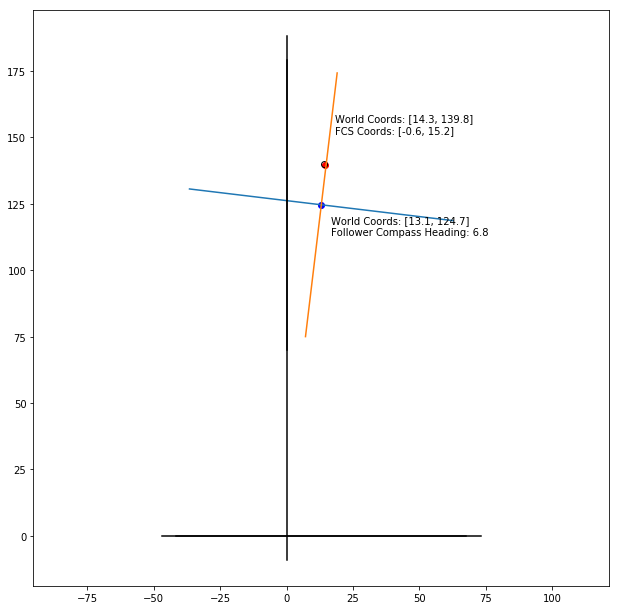

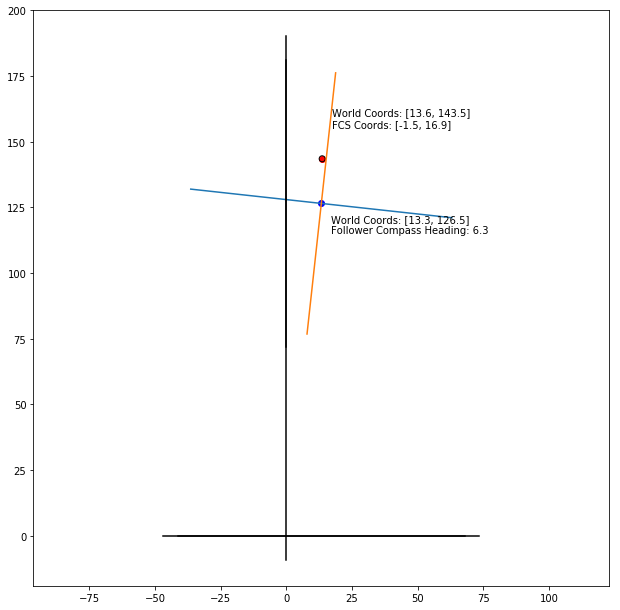

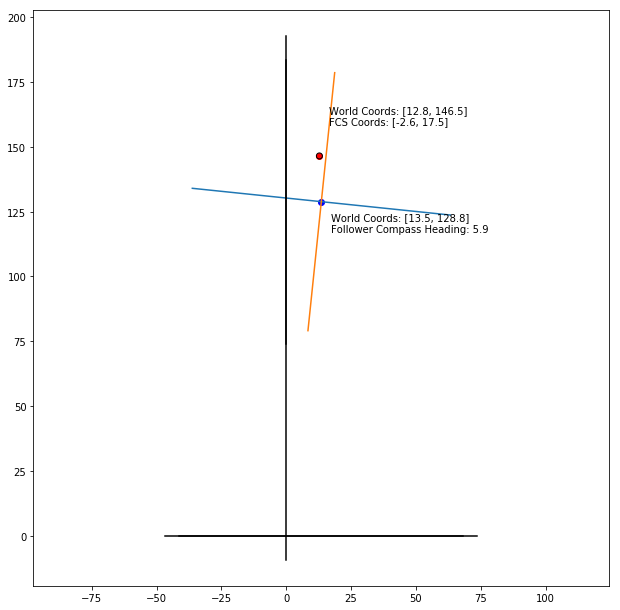

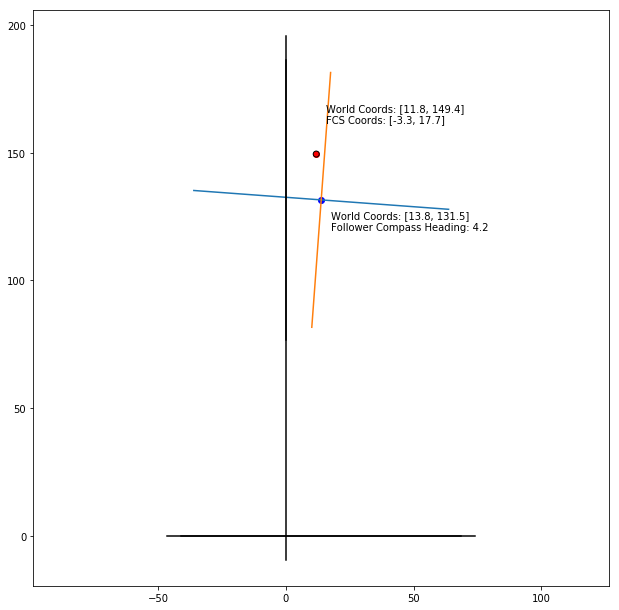

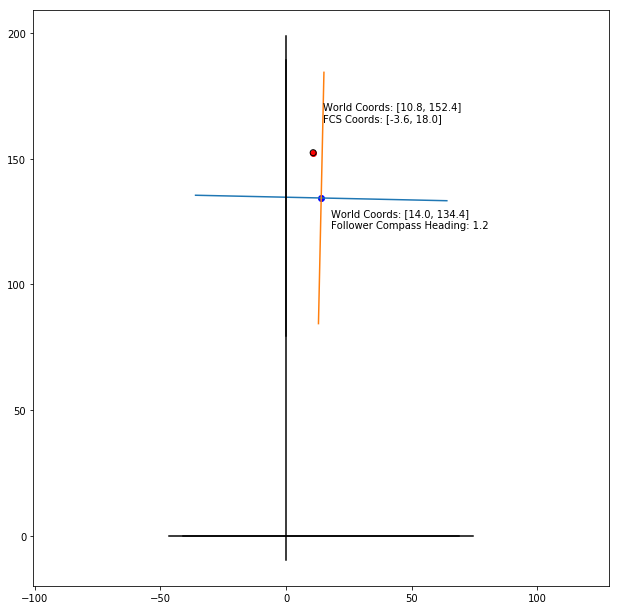

In [8]:

for i in range(0, len(simData['time'])):
    
    fig = plt.figure(figsize=(8,8))
    axes = fig.add_axes([0,0,1,1])
    
    # Plot the Follower and Leader as they appear in the world systems coordinates
    axes.scatter(simData['follower_world_cs_x'].iloc[i], simData['follower_world_cs_z'].iloc[i],
                   c='blue', label='Follower')
    axes.scatter(simData['leader_world_cs_x'].iloc[i], simData['leader_world_cs_z'].iloc[i],
                   c='red', label='Leader')
    
    # The rotation for the frame transformation to the follower's CS
    FT_R11 = simData['follower_FT_R11'].iloc[i]
    FT_R21 = simData['follower_FT_R21'].iloc[i]
    FT_R12 = simData['follower_FT_R12'].iloc[i]
    FT_R22 = simData['follower_FT_R22'].iloc[i]
    # The rotation part of the frame transformation to the Follower's CS as returned by 
    # math_utils.followerFrameTransformation.
    # **This is the rotation matrix that takes the Leader's coordinates IN WORLD CS, 
    # and transforms them to the coordinates IN THE FOLLOWER'S CS**
    followerFT = np.array([[FT_R11, FT_R12], [FT_R21, FT_R22]])
        # Frame transformation rotation is inverted (in math_utils.followerFrameTransformation(), 
        # for use with leader coordinates in world cs) before being returned to Supervisor.updateFCSLeaderPose().
        # Invert again to get original rotation matrix
        # **This is the "original" rotation matrix, as in it is the rotation that takes the basis
        # vectors in world CS to the Follower's basis vectors (still as seen in world CS).  Applying this 
        # rotation matrix to the Leader's coordinates IN FOLLOWER'S CS gives us the Leader's coordinates
        # IN WORLD CS**
    invFollowerFT = np.linalg.inv(followerFT) 
    
    basis = np.array([[50,0],[0,50]]) # * 50 for visibility
    rotatedBasis = invFollowerFT.dot(basis) # The Follower's basis vectors as seen IN WORLD CS.
    
    followerPos = np.array([simData['follower_world_cs_x'].iloc[i], simData['follower_world_cs_z'].iloc[i]])
    
    # Find the end points for the follower's own axes IN WORLD CS
    # Translate the basis to the Follower's position IN WORLD CS
    followerXAxEP1 = followerPos - rotatedBasis[:,0]
    followerXAxEP2 = followerPos + rotatedBasis[:,0]
    followerZAxEP1 = followerPos - rotatedBasis[:,1]
    followerZAxEP2 = followerPos + rotatedBasis[:,1]
    
    # x-axis
    axes.plot(np.array([followerXAxEP1[0], followerXAxEP2[0]]),np.array([followerXAxEP1[1], followerXAxEP2[1]]))
    # z-axis
    axes.plot(np.array([followerZAxEP1[0], followerZAxEP2[0]]),np.array([followerZAxEP1[1], followerZAxEP2[1]]))
    # Some axis formatting stuff because they get out of whack
    axes.axis('equal')
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    axes.plot([0,0], ylims, c="black")
    axes.plot(xlims, [0,0], c="black")
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    axes.plot([0,0], ylims, c="black")
    axes.plot(xlims, [0,0], c="black")
    # Annotate the Leader with the coordinates as they should be IN FOLLOWER CS
    leaderText = ("World Coords: [" 
            + str(np.round(simData['leader_world_cs_x'].iloc[i],1)) + ", "
            + str(np.round(simData['leader_world_cs_z'].iloc[i],1)) + "]\n"
            + "FCS Coords: [" 
            + str(np.round(simData['leader_follower_cs_x'].iloc[i],1)) + ", "
            + str(np.round(simData['leader_follower_cs_z'].iloc[i],1)) + "]\n"
            )
    followerText = ("World Coords: ["
                   + str(np.round(simData['follower_world_cs_x'].iloc[i],1)) + ", "
                   + str(np.round(simData['follower_world_cs_z'].iloc[i],1)) + "]\n"
                   + "Follower Compass Heading: " + str(np.round(simData['follower_compass_heading'].iloc[i],1))
                   )
    # Annotate Leader point
    plt.annotate(leaderText, xy=(simData['leader_world_cs_x'].iloc[i], simData['leader_world_cs_z'].iloc[i]),
                xycoords='data',xytext=(+10,+20), textcoords='offset points')
    # Annotate Follower point
    plt.annotate(followerText, xy=(simData['follower_world_cs_x'].iloc[i], simData['follower_world_cs_z'].iloc[i]),
                xycoords='data',xytext=(+10,-30), textcoords='offset points')
    
    # Plot the projected location of the Leader (IN WORLD CS), as the Follower sees it in its own CS (ie. convert
    # from FOLLOWER CS to WORLD CS) 
    leaderInFollowerCS = np.array([simData['leader_follower_cs_x'].iloc[i], simData['leader_follower_cs_z'].iloc[i]])
    projLeaderPoint = invFollowerFT.dot(leaderInFollowerCS) + followerPos
    axes.scatter(projLeaderPoint[0], projLeaderPoint[1], marker='o', facecolors='none', edgecolors="black")
  

In [9]:
simData['follower_dist_from_orig'] = (simData['follower_world_cs_x']**2 + simData['follower_world_cs_z']**2)**0.5
deltaTime = simData['time'].iloc[1] - simData['time'].iloc[0]
velocity = [0]
for i in range(1,len(simData['time'])):
    velocity.append((simData['follower_dist_from_orig'].iloc[i] - simData['follower_dist_from_orig'].iloc[i-1]) / deltaTime)
simData['follower_velocity'] = np.array(velocity)
simData['follower_velocity']

0     0.000000
1    -0.017554
2    -0.014631
3     0.277017
4     0.900219
5     1.490379
6     2.000499
7     2.274232
8     2.588643
9     2.658715
10    2.807572
11    2.832653
12    2.952295
13    2.790175
14    2.352626
15    1.868585
16    1.514485
17    1.258364
18    0.999807
19    1.017348
20    1.463100
21    2.026502
22    2.479422
23    2.903677
24    3.139344
25    3.353572
26    3.524771
27    3.678639
28    3.888791
29    3.927137
30    3.876318
31    3.441784
32    3.092074
33    2.449263
34    2.005636
35    1.588259
36    1.300103
37    1.022232
38    0.836679
39    1.112690
40    1.774819
41    2.249610
42    2.707642
43    2.972265
44    3.275519
45    3.407636
46    3.640211
47    3.714895
48    3.743416
49    3.397736
50    3.133167
51    2.540412
52    2.083850
53    1.673158
54    1.871602
55    2.330071
56    2.684337
57    2.916536
Name: follower_velocity, dtype: float64

Text(0.5, 1.0, 'Follower velocity at full motor power')

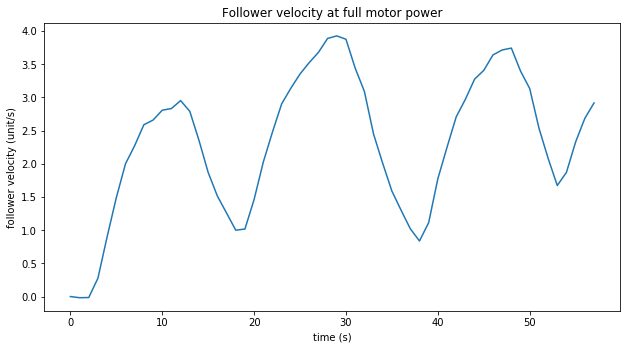

In [10]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(simData['time'], simData['follower_velocity'])
axes.set_xlabel('time (s)')
axes.set_ylabel('follower velocity (unit/s)')
axes.set_title('Follower velocity at full motor power')

Plot the Leader and Follower, with the latter's optimal distance from the former

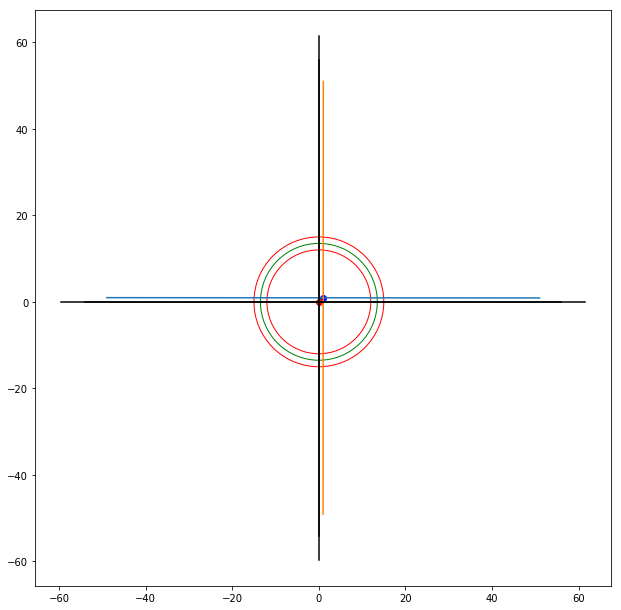

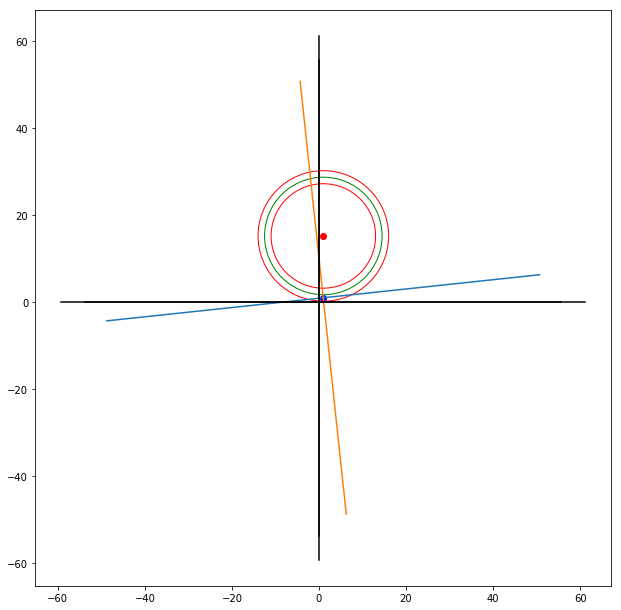

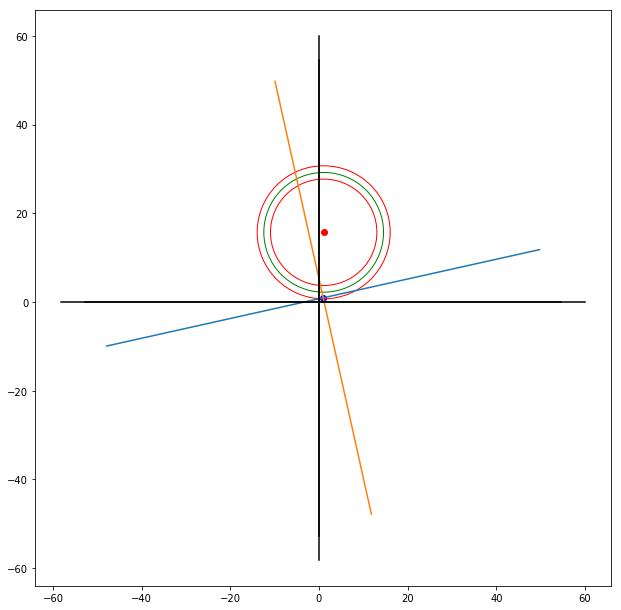

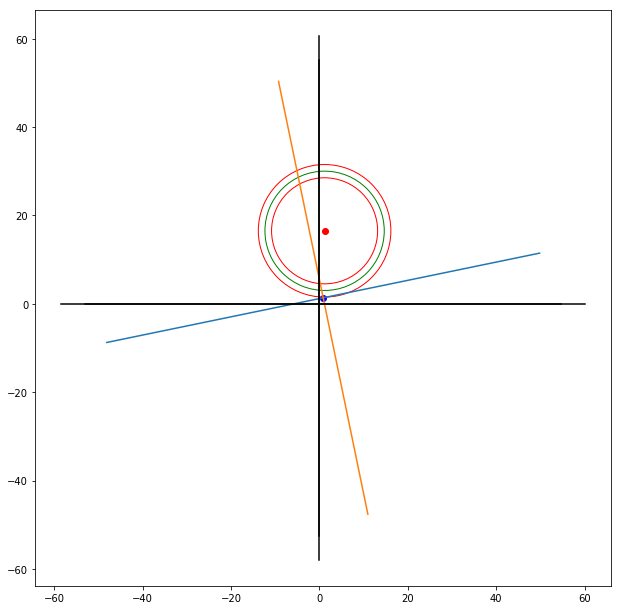

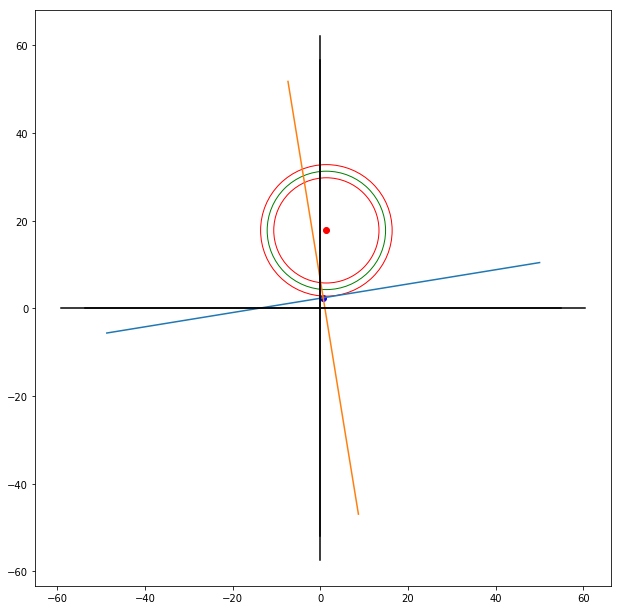

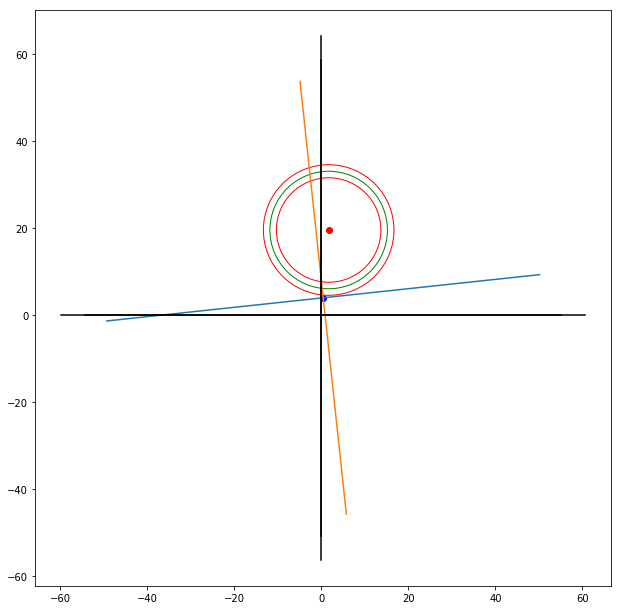

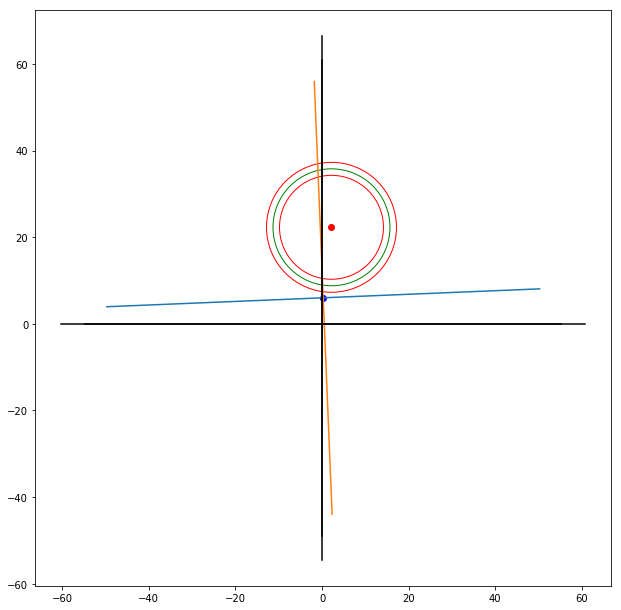

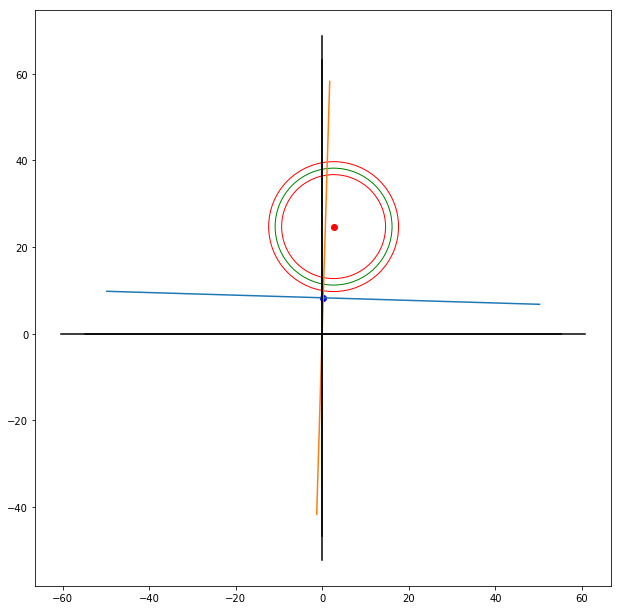

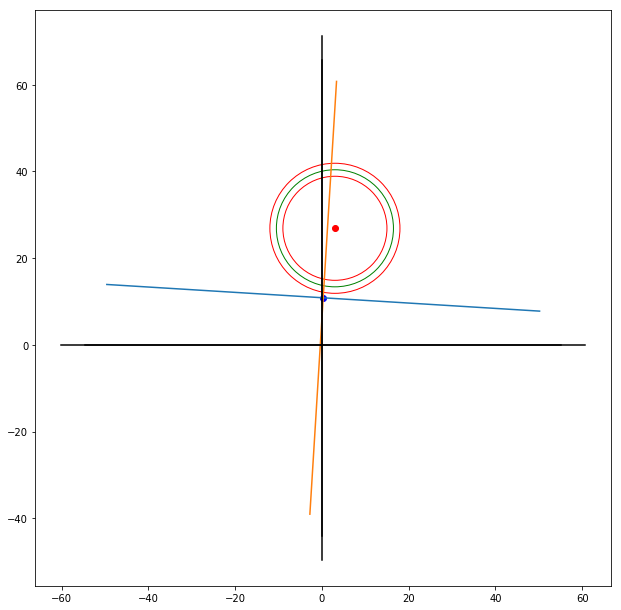

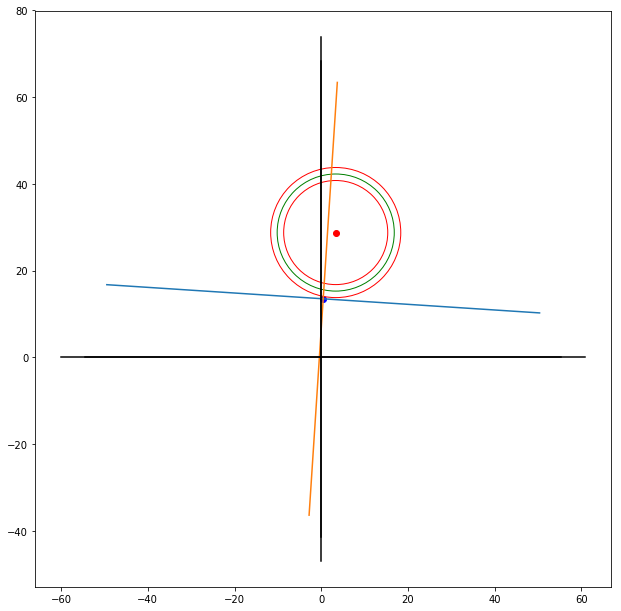

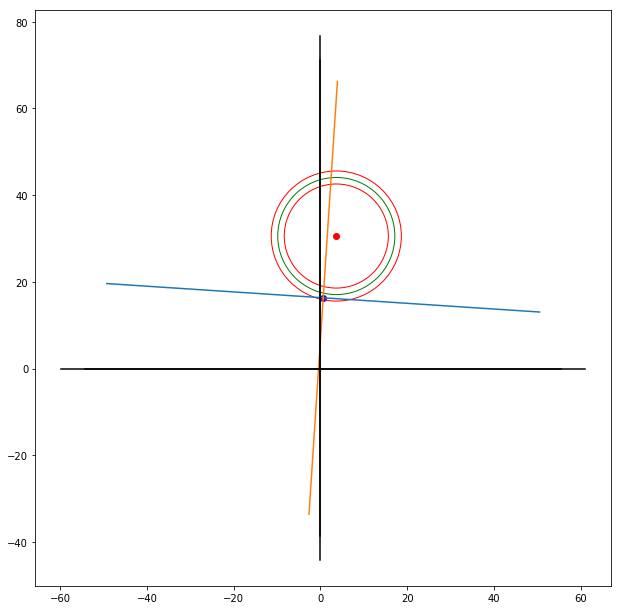

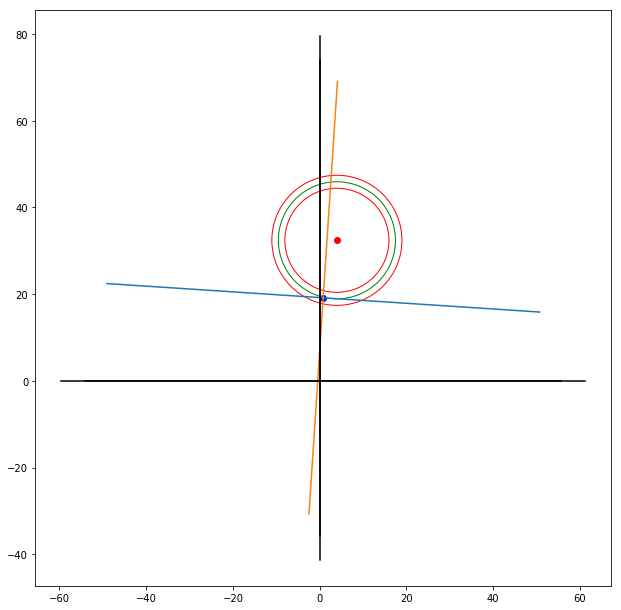

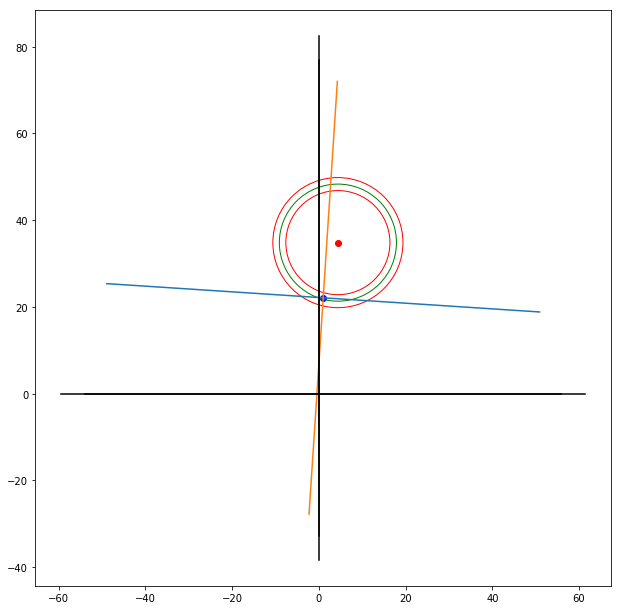

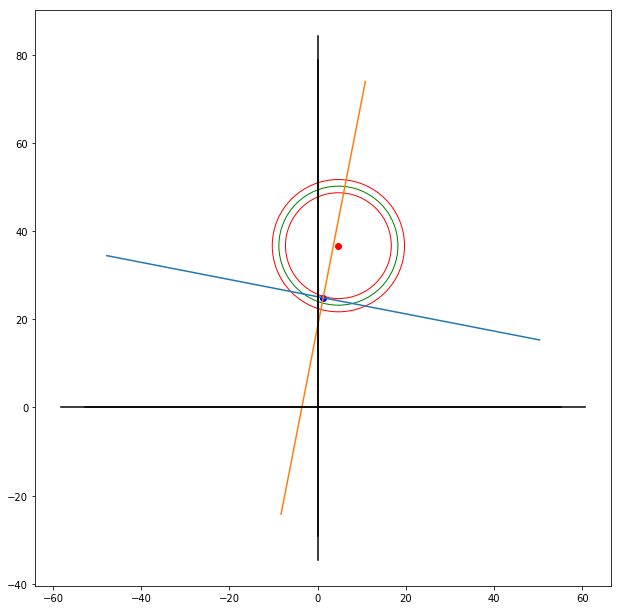

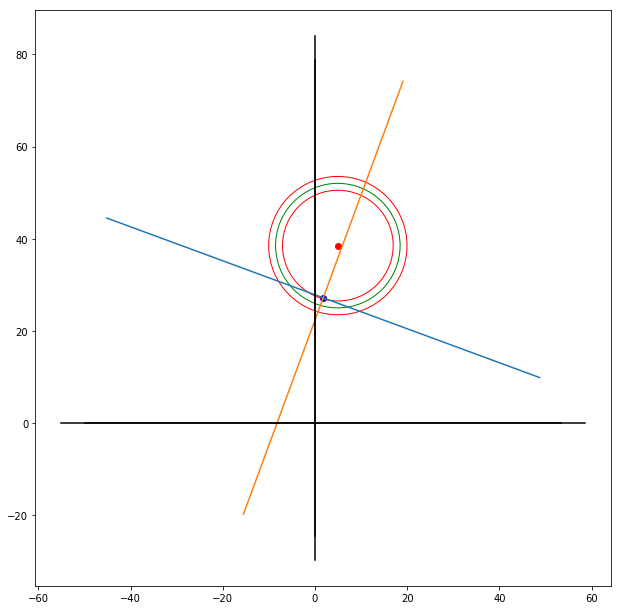

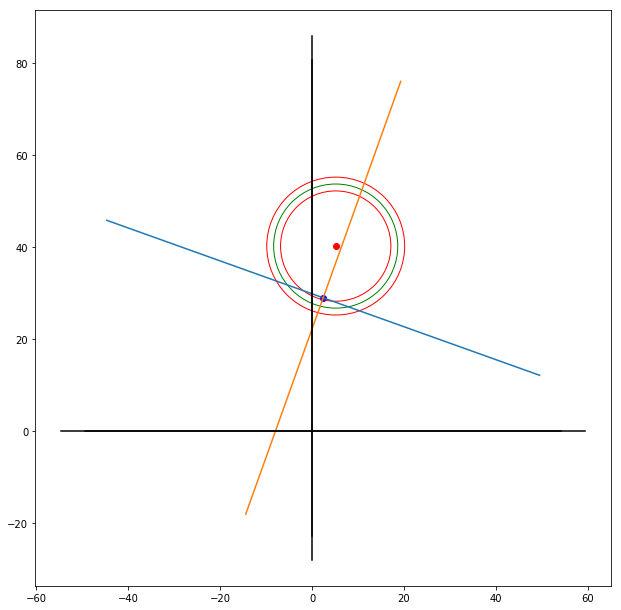

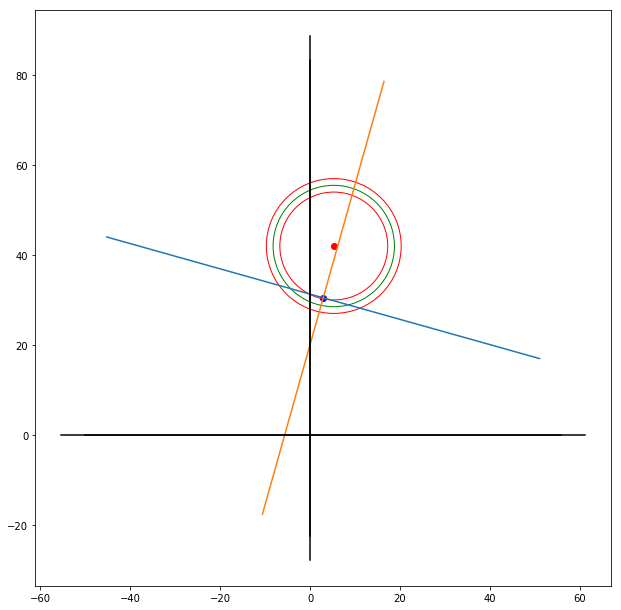

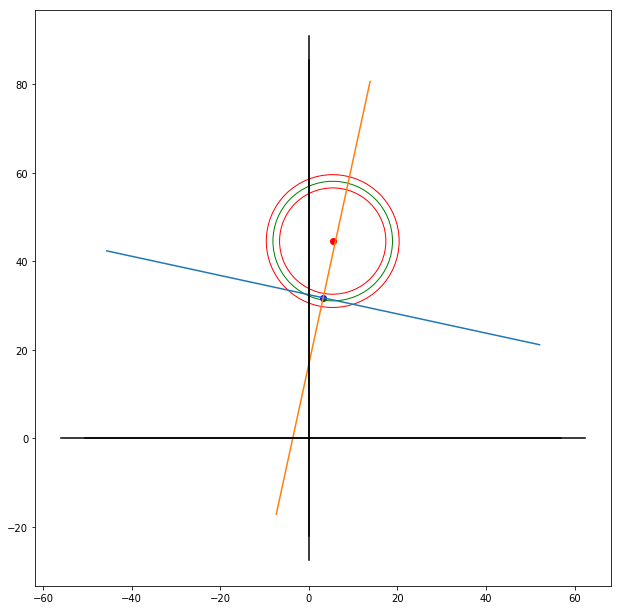

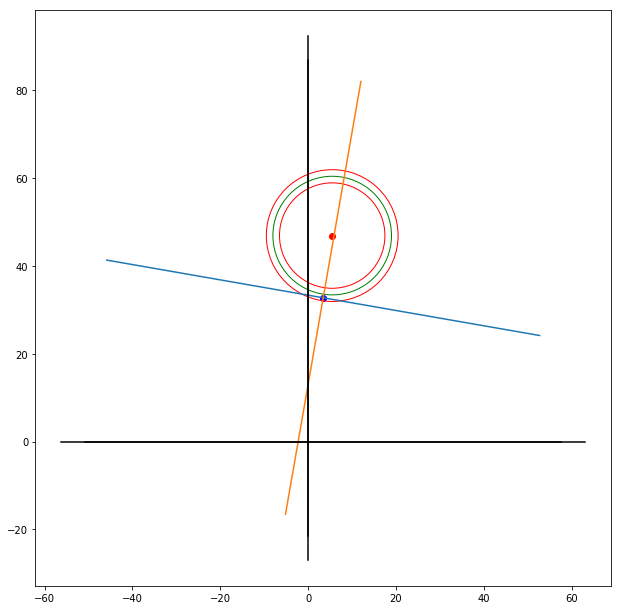

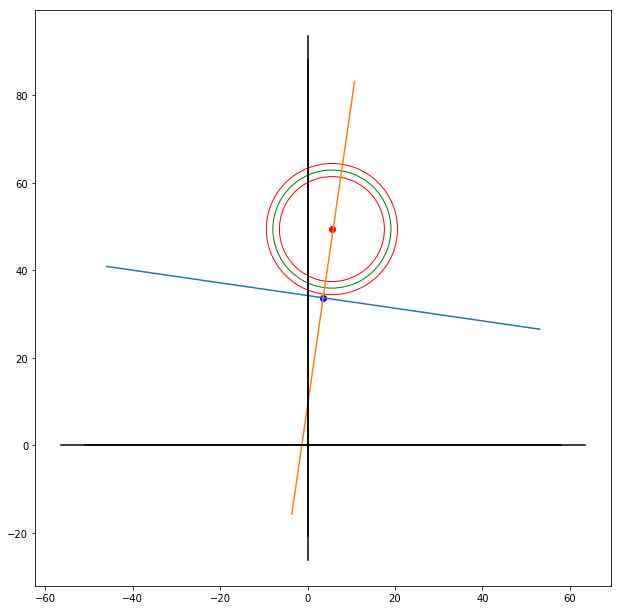

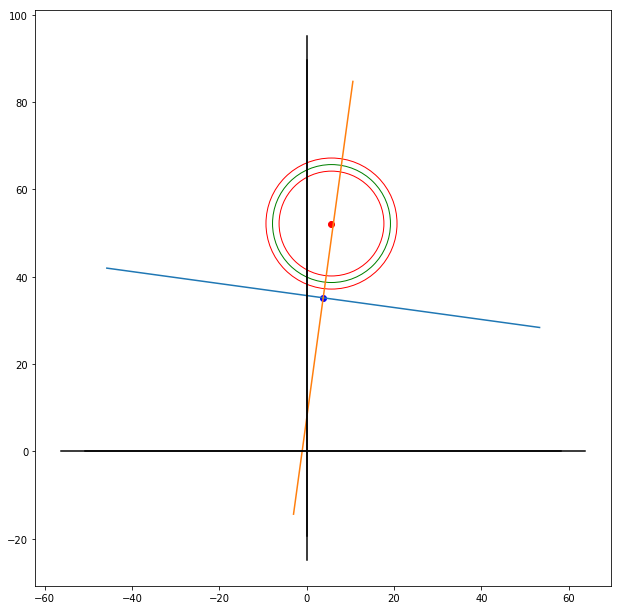

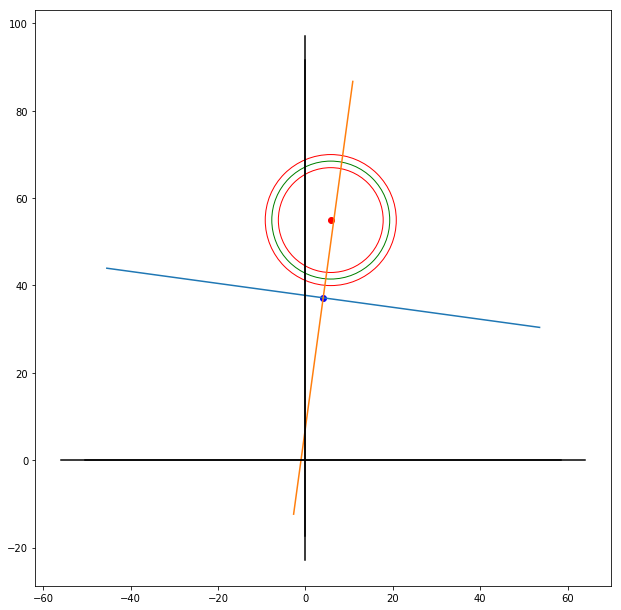

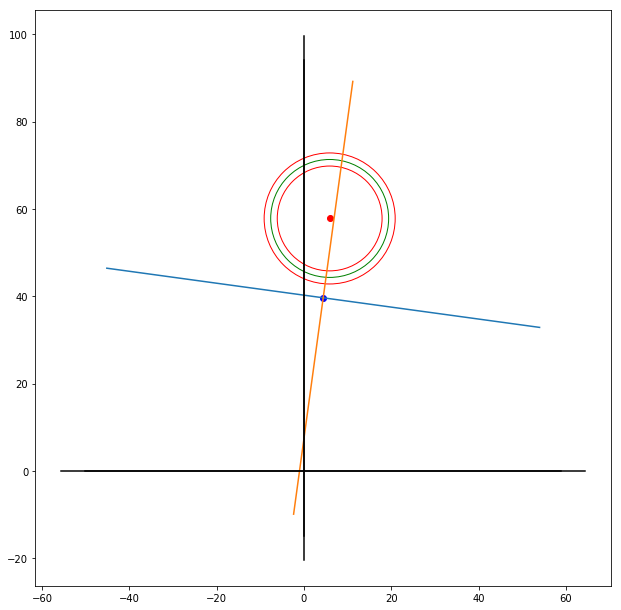

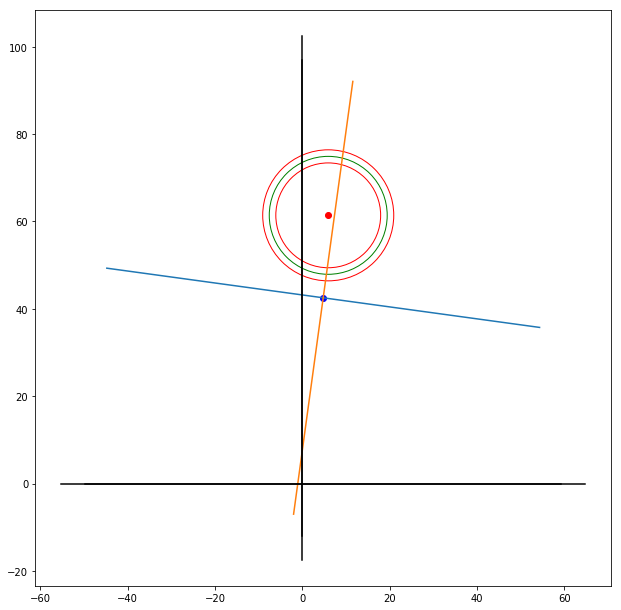

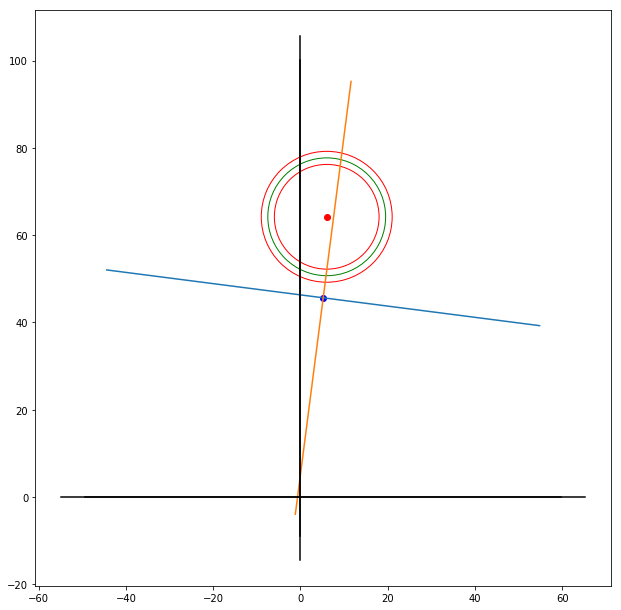

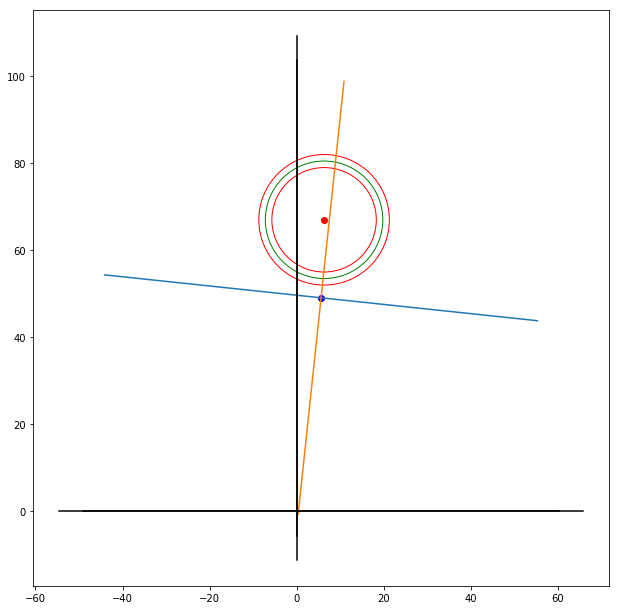

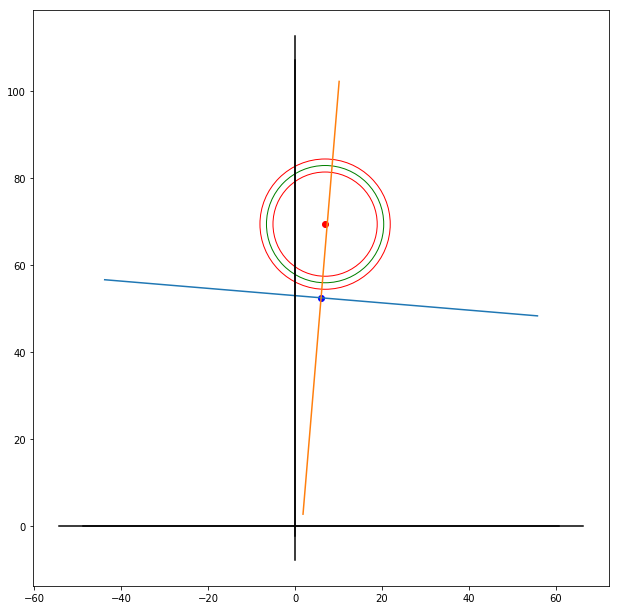

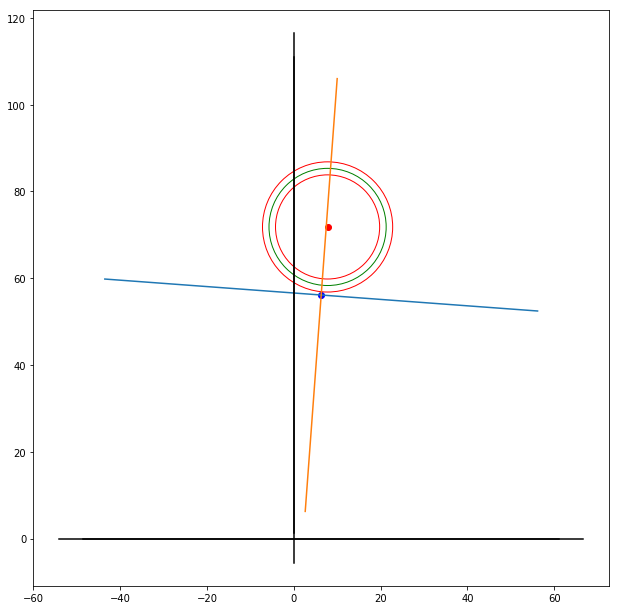

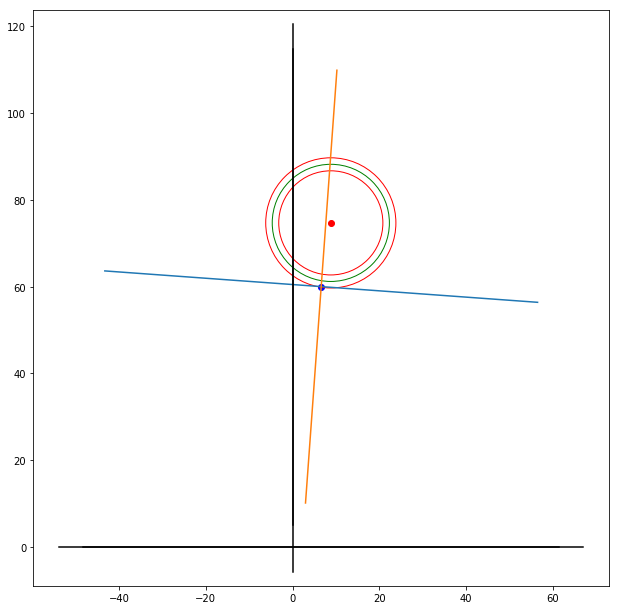

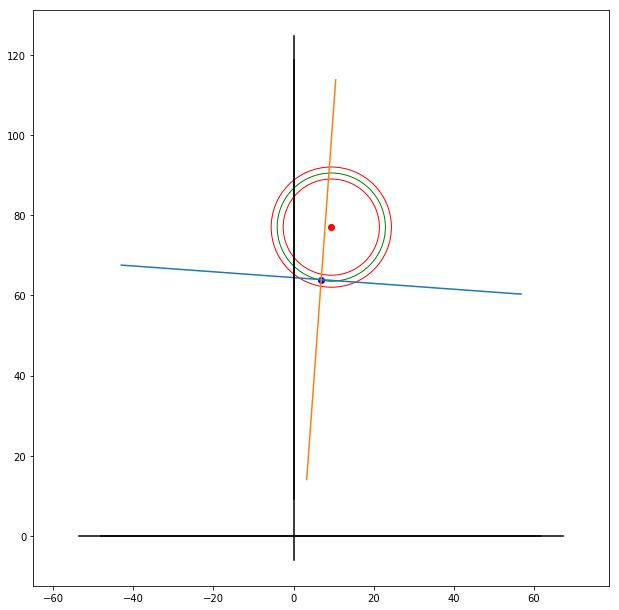

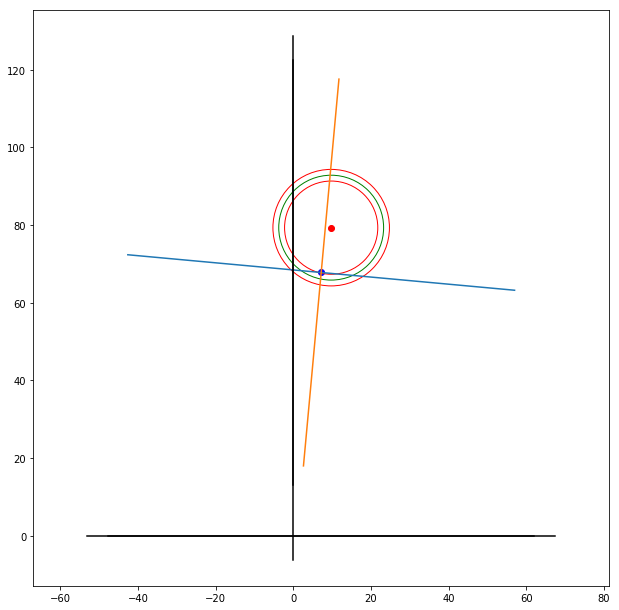

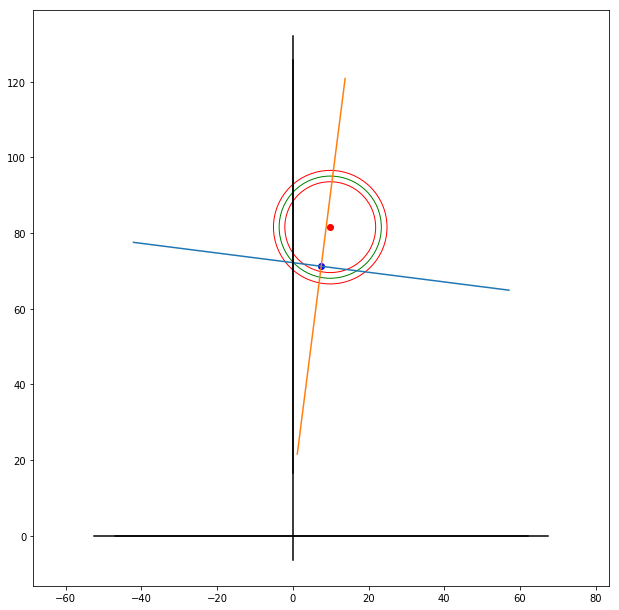

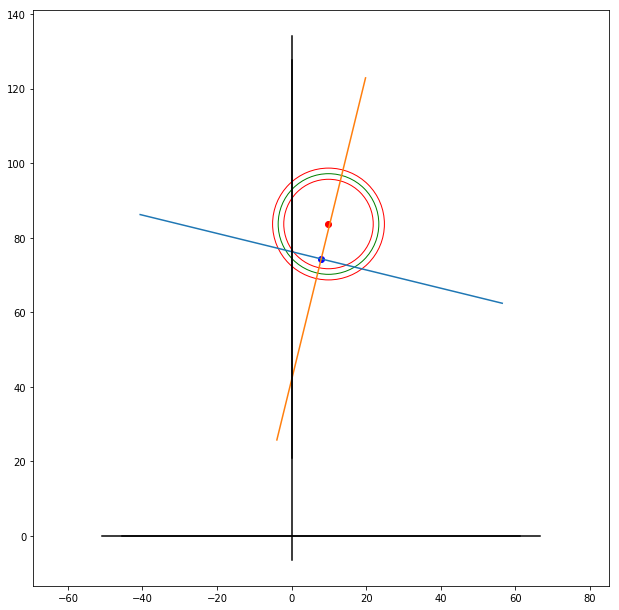

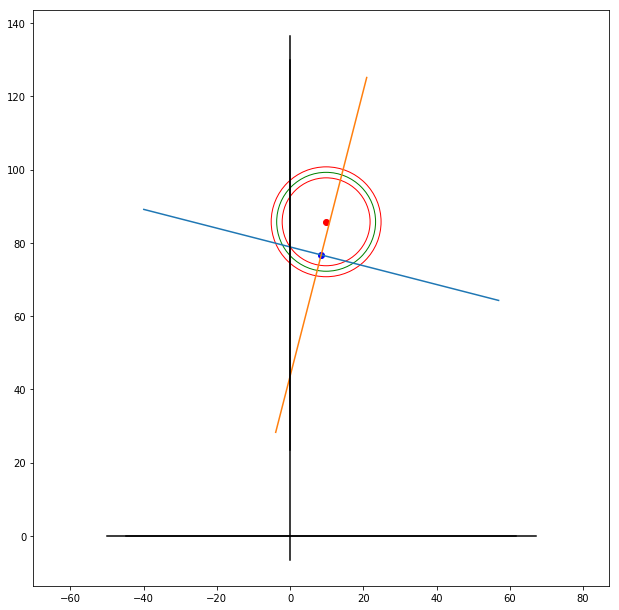

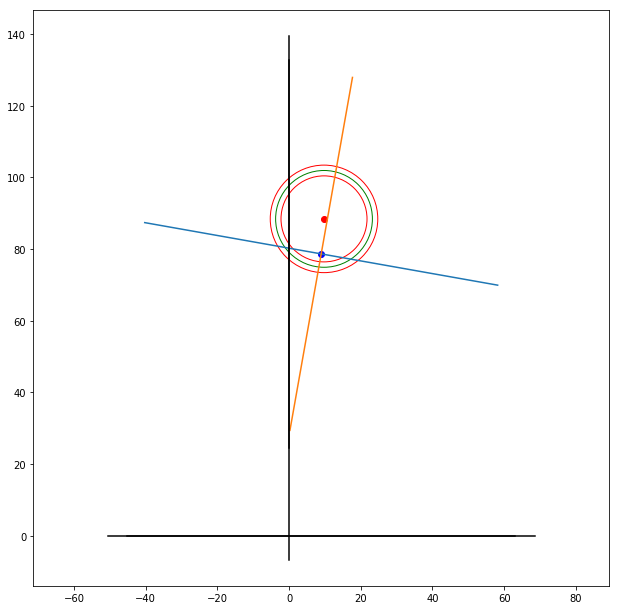

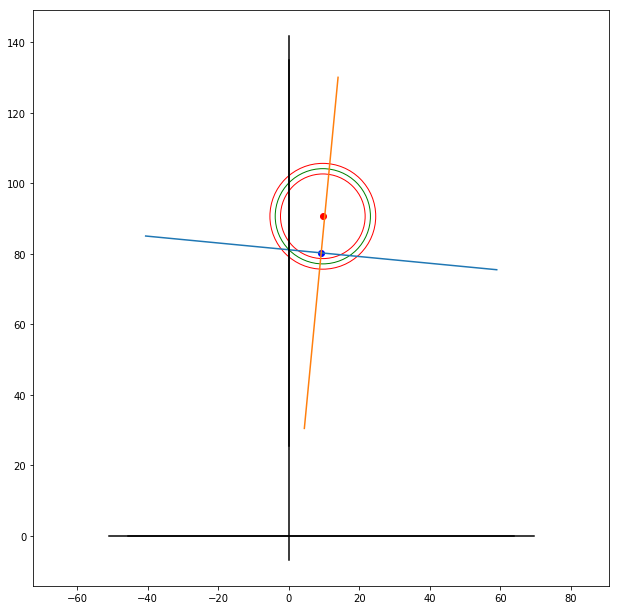

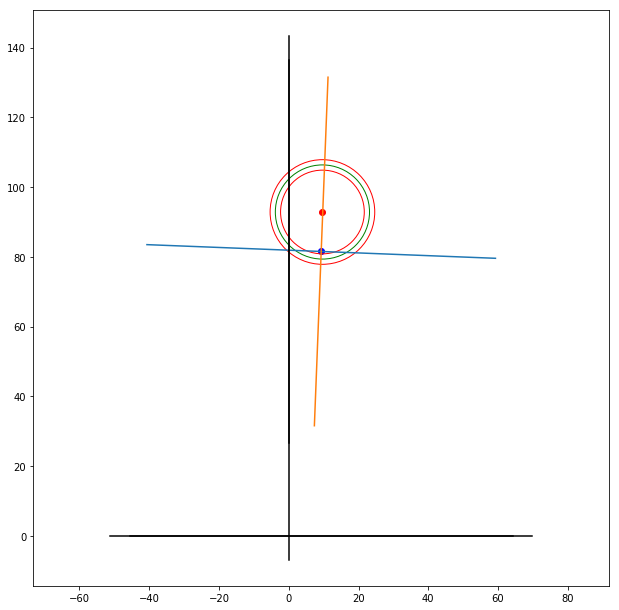

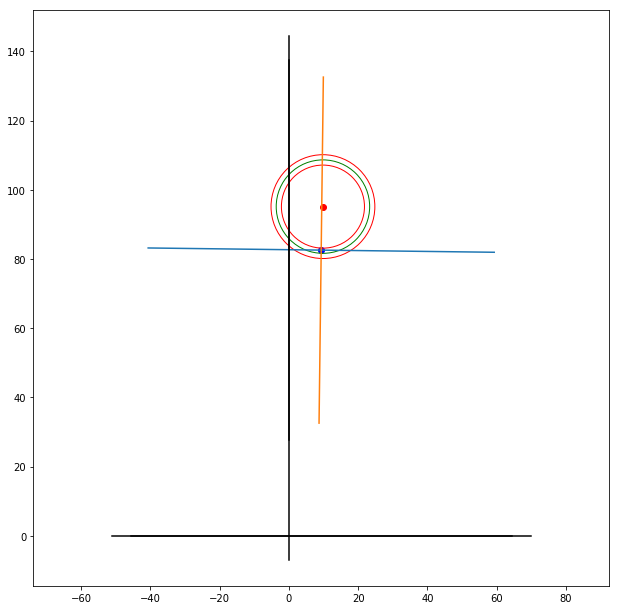

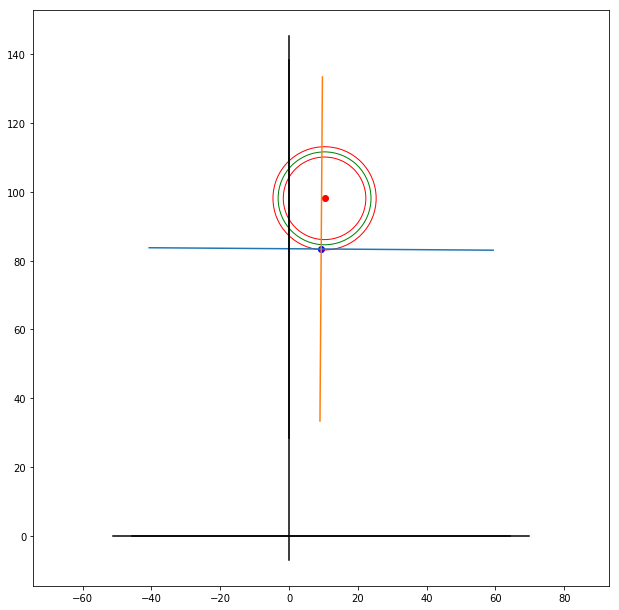

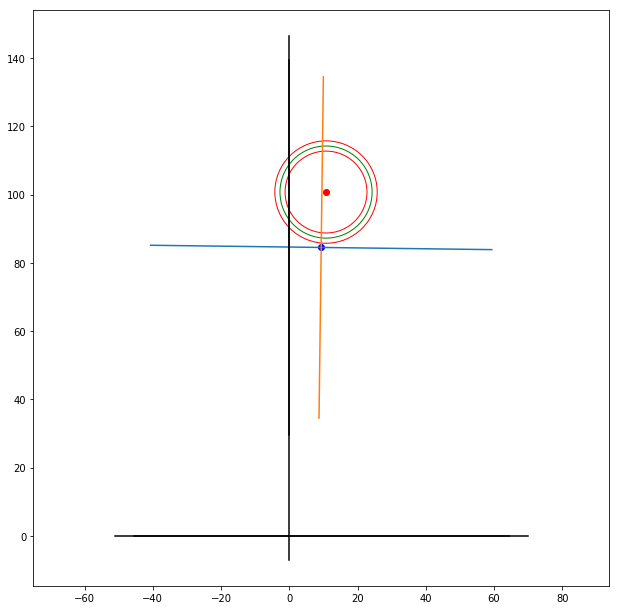

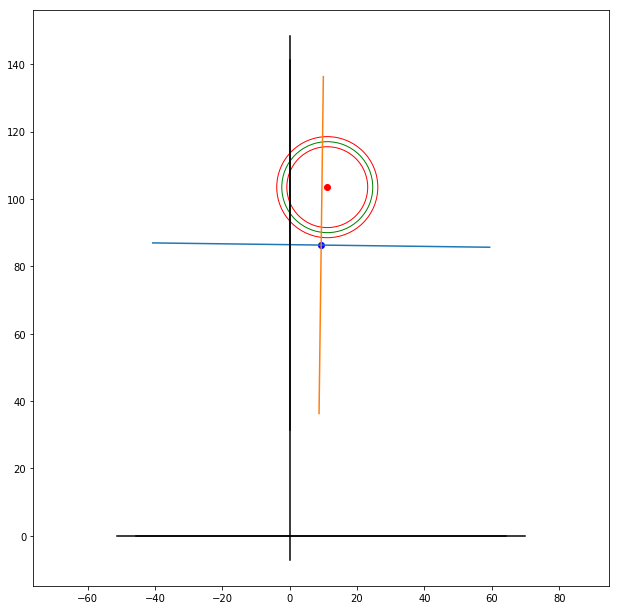

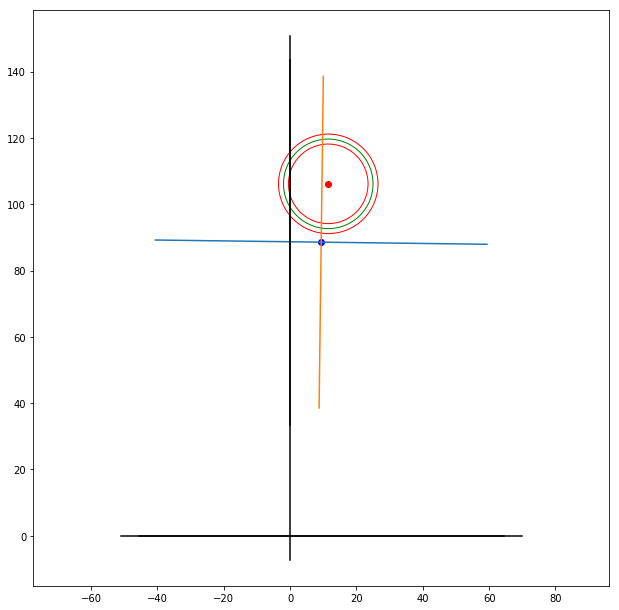

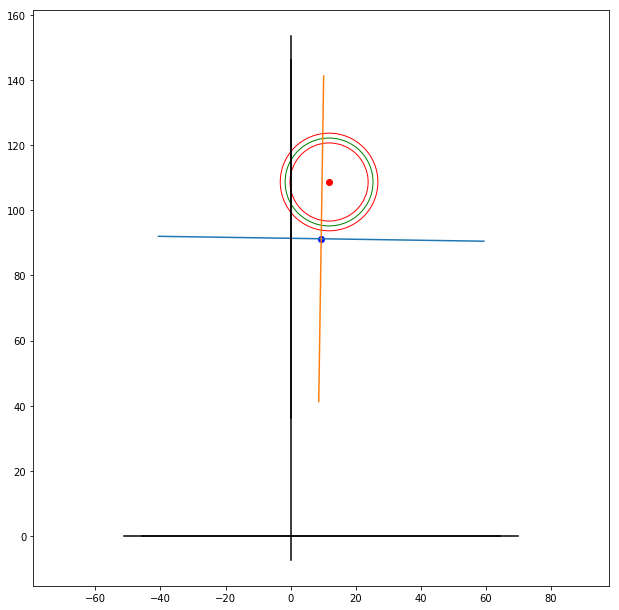

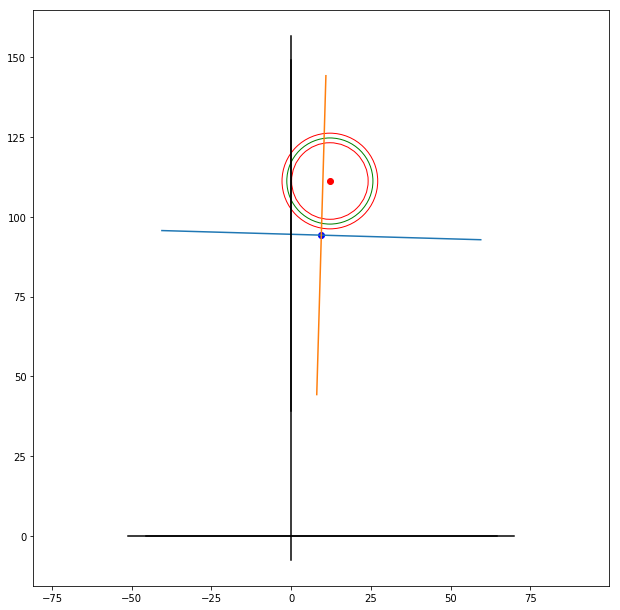

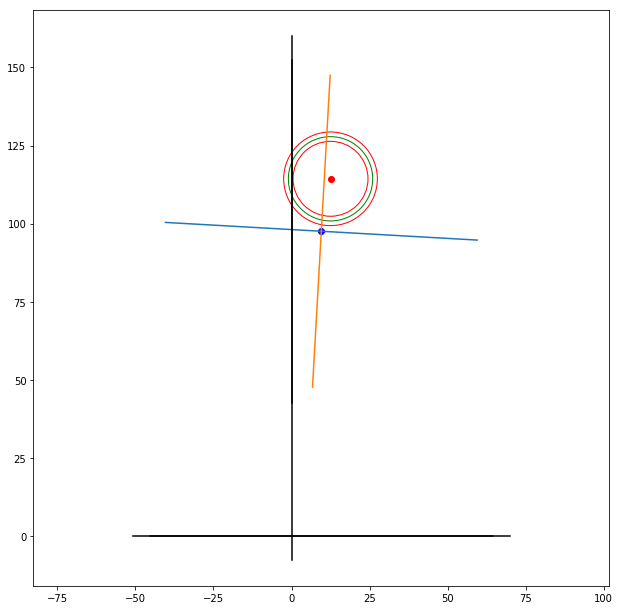

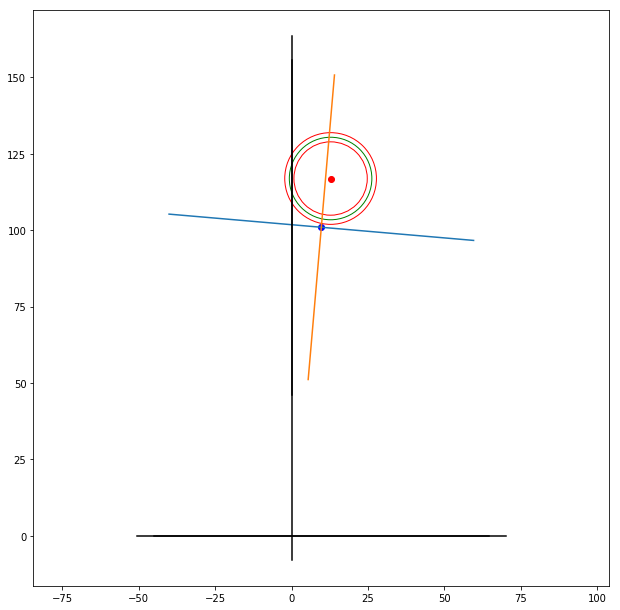

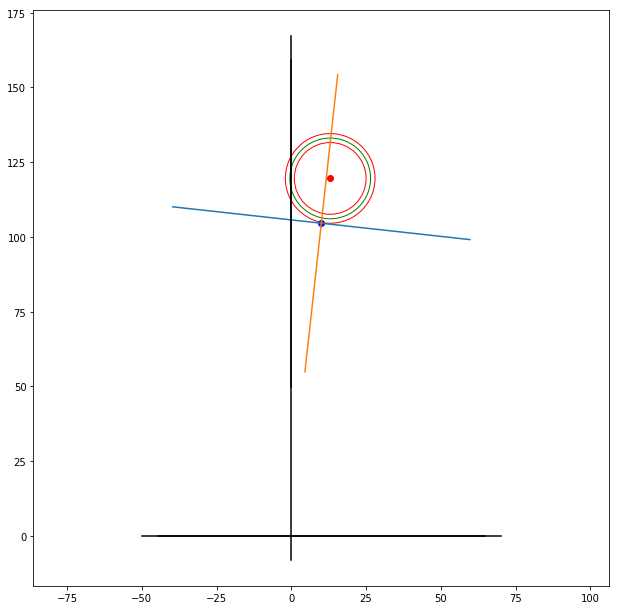

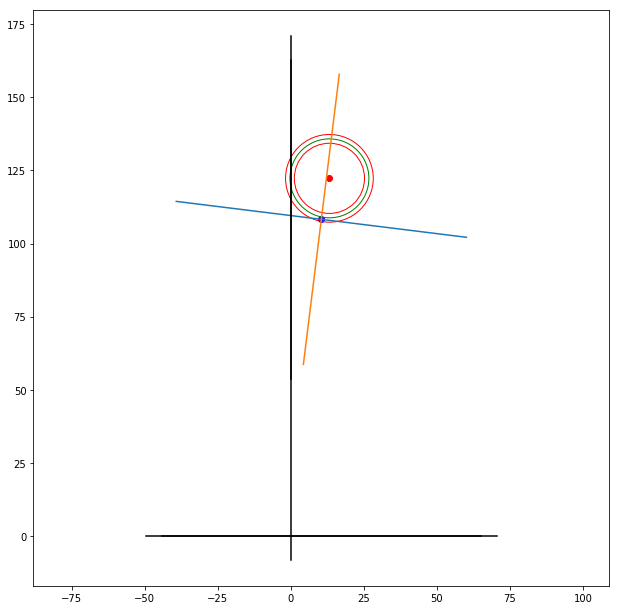

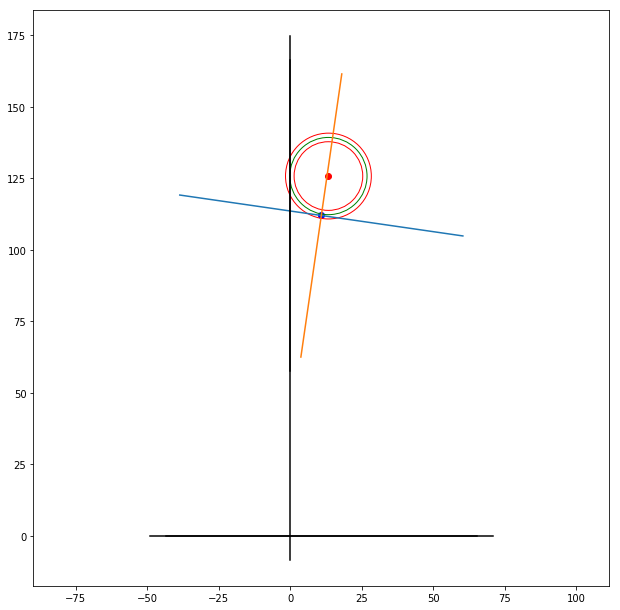

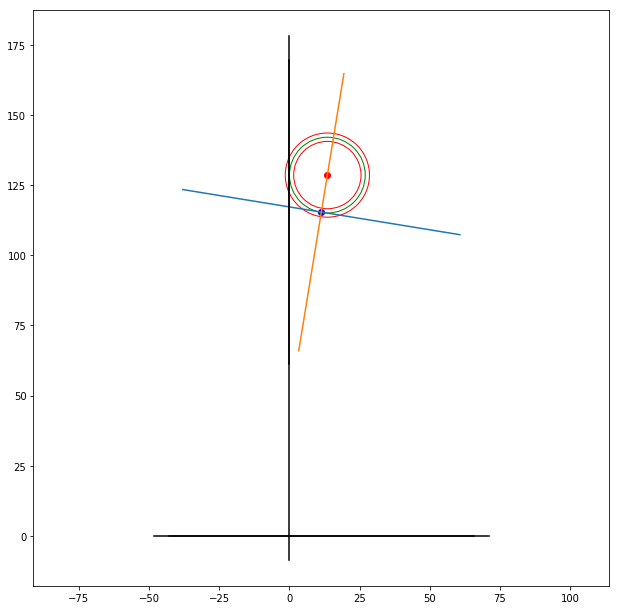

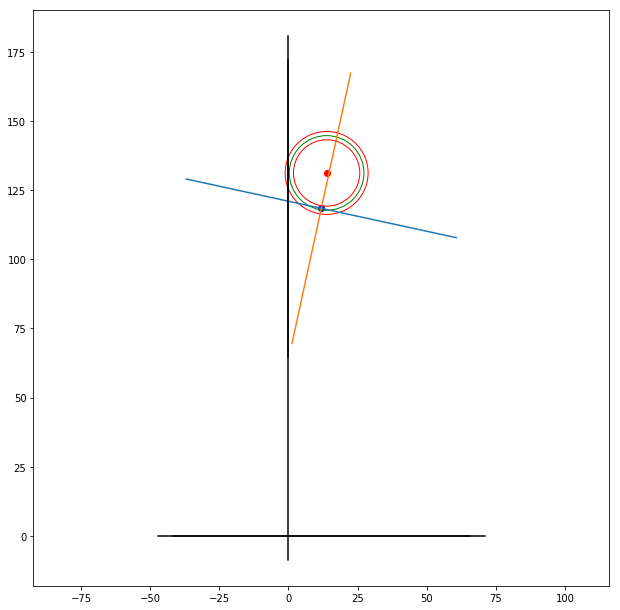

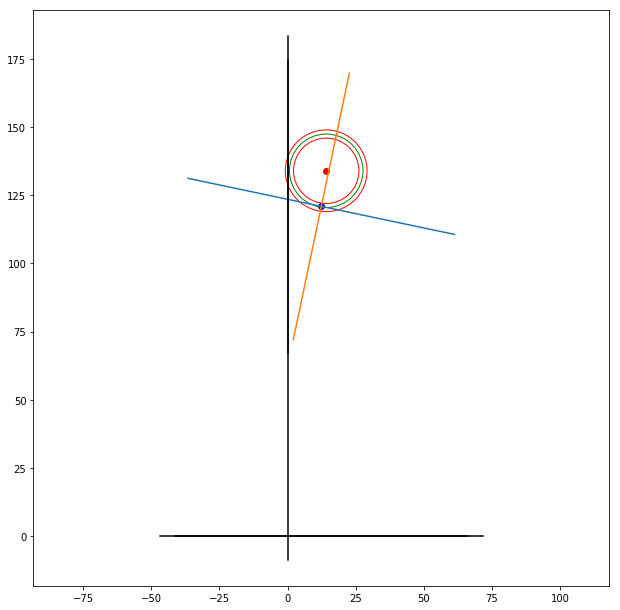

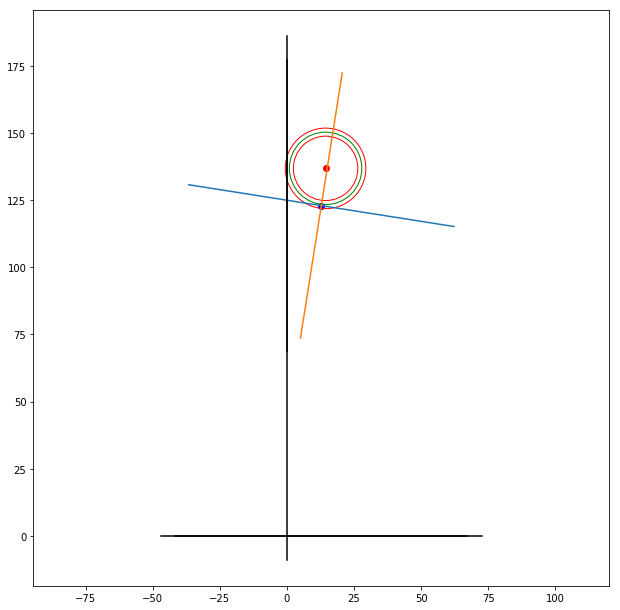

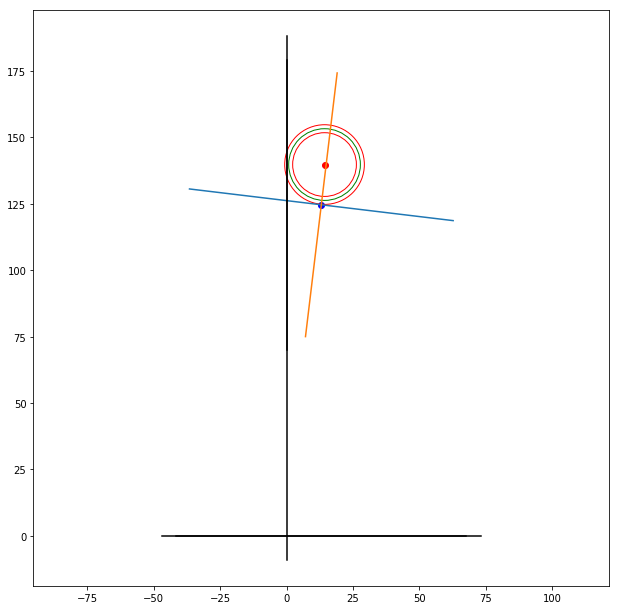

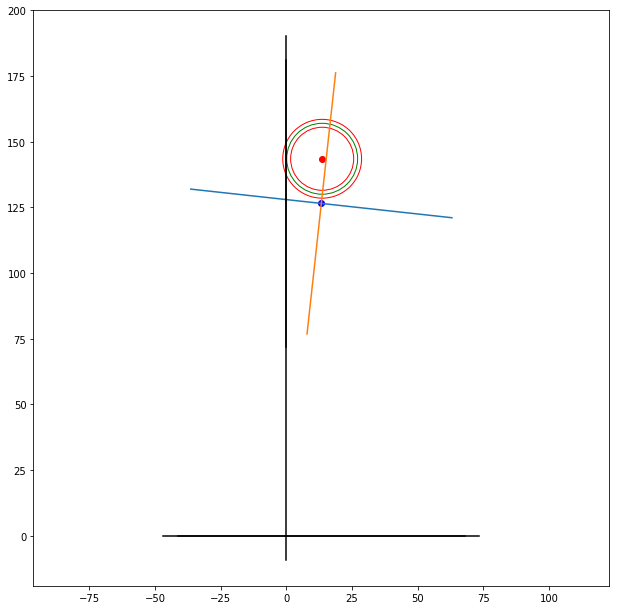

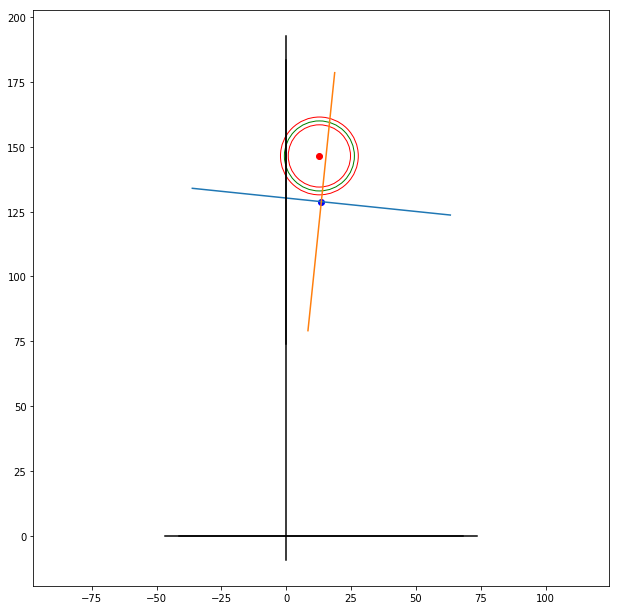

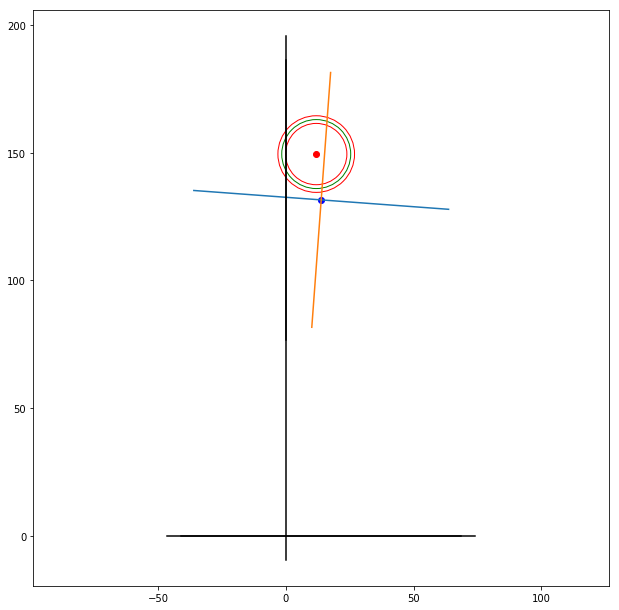

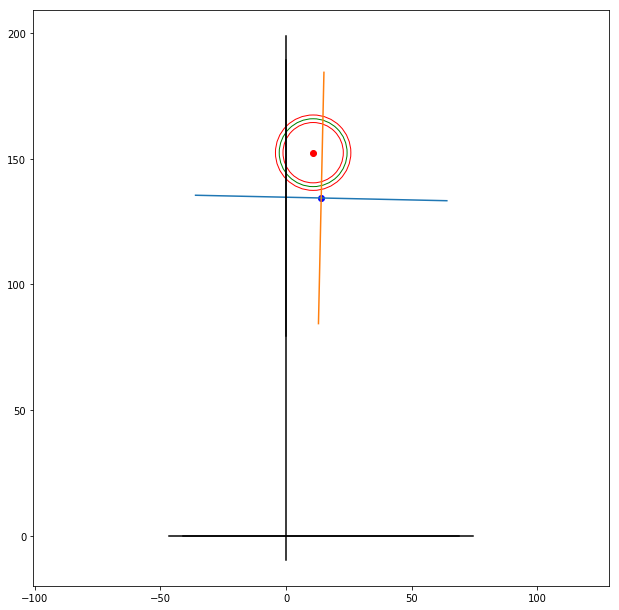

In [11]:
for i in range(0, len(simData['time'])):
    
    fig = plt.figure(figsize=(8,8))
    axes = fig.add_axes([0,0,1,1])
    
    # Plot the Follower and Leader as they appear in the world systems coordinates
    axes.scatter(simData['follower_world_cs_x'].iloc[i], simData['follower_world_cs_z'].iloc[i],
                   c='blue', label='Follower')
    axes.scatter(simData['leader_world_cs_x'].iloc[i], simData['leader_world_cs_z'].iloc[i],
                   c='red', label='Leader')
    
    # The rotation for the frame transformation to the follower's CS
    FT_R11 = simData['follower_FT_R11'].iloc[i]
    FT_R21 = simData['follower_FT_R21'].iloc[i]
    FT_R12 = simData['follower_FT_R12'].iloc[i]
    FT_R22 = simData['follower_FT_R22'].iloc[i]
    # The rotation part of the frame transformation to the Follower's CS as returned by 
    # math_utils.followerFrameTransformation.
    # **This is the rotation matrix that takes the Leader's coordinates IN WORLD CS, 
    # and transforms them to the coordinates IN THE FOLLOWER'S CS**
    followerFT = np.array([[FT_R11, FT_R12], [FT_R21, FT_R22]])
        # Frame transformation rotation is inverted (in math_utils.followerFrameTransformation(), 
        # for use with leader coordinates in world cs) before being returned to Supervisor.updateFCSLeaderPose().
        # Invert again to get original rotation matrix
        # **This is the "original" rotation matrix, as in it is the rotation that takes the basis
        # vectors in world CS to the Follower's basis vectors (still as seen in world CS).  Applying this 
        # rotation matrix to the Leader's coordinates IN FOLLOWER'S CS gives us the Leader's coordinates
        # IN WORLD CS**
    invFollowerFT = np.linalg.inv(followerFT) 
    
    basis = np.array([[50,0],[0,50]]) # * 50 for visibility
    rotatedBasis = invFollowerFT.dot(basis) # The Follower's basis vectors as seen IN WORLD CS.
    
    followerPos = np.array([simData['follower_world_cs_x'].iloc[i], simData['follower_world_cs_z'].iloc[i]])
    
    # Find the end points for the follower's own axes IN WORLD CS
    # Translate the basis to the Follower's position IN WORLD CS
    followerXAxEP1 = followerPos - rotatedBasis[:,0]
    followerXAxEP2 = followerPos + rotatedBasis[:,0]
    followerZAxEP1 = followerPos - rotatedBasis[:,1]
    followerZAxEP2 = followerPos + rotatedBasis[:,1]
    
    # x-axis
    axes.plot(np.array([followerXAxEP1[0], followerXAxEP2[0]]),np.array([followerXAxEP1[1], followerXAxEP2[1]]))
    # z-axis
    axes.plot(np.array([followerZAxEP1[0], followerZAxEP2[0]]),np.array([followerZAxEP1[1], followerZAxEP2[1]]))
    # Some axis formatting stuff because they get out of whack
    axes.axis('equal')
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    axes.plot([0,0], ylims, c="black")
    axes.plot(xlims, [0,0], c="black")
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    axes.plot([0,0], ylims, c="black")
    axes.plot(xlims, [0,0], c="black")
    
    
    # Add circles for goal distances from Leader
    minCircle = plt.Circle((simData['leader_world_cs_x'].iloc[i], simData['leader_world_cs_z'].iloc[i]),
                          simData['min_follower_distance'].iloc[1],
                          color="red",
                          fill=False)
    maxCircle = plt.Circle((simData['leader_world_cs_x'].iloc[i], simData['leader_world_cs_z'].iloc[i]),
                          simData['max_follower_distance'].iloc[1],
                          color="red",
                          fill=False)
    optimalCircle = plt.Circle((simData['leader_world_cs_x'].iloc[i], simData['leader_world_cs_z'].iloc[i]),
                          simData['optimal_follower_distance'].iloc[1],
                          color="green",
                          fill=False)
    axes.add_artist(minCircle)
    axes.add_artist(maxCircle)
    axes.add_artist(optimalCircle)